In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


# Step :1 read date column as date time datatype

In [2]:
dfconfirmIndia=pd.read_csv('/content/IndiaALL.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfconfirmBangladesh=pd.read_csv('/content/bangladeshAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfconfirmJapan=pd.read_csv('/content/JapanAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfconfirmFrance=pd.read_csv('/content/FranceAll.csv' ,parse_dates=['Date'],  index_col=['Date'])

dfconfirmGermany=pd.read_csv('/content/GermanyAll.csv',parse_dates=['Date'],  index_col=['Date'] )

dfconfirmItaly=pd.read_csv('/content/ItalyAll.csv',parse_dates=['Date'],  index_col=['Date'] )


dfconfirmNewzeland=pd.read_csv('/content/NewZelandAll.csv',parse_dates=['Date'],  index_col=['Date'] )


dfconfirmPakistan=pd.read_csv('/content/PakistanAll.csv',parse_dates=['Date'],  index_col=['Date'])




In [3]:
dfDeathIndia=pd.read_csv('/content/IndiaALL.csv' ,parse_dates=['Date'],  index_col=['Date'])

dfDeathBangladesh=pd.read_csv('/content/bangladeshAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfDeathJapan=pd.read_csv('/content/JapanAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfDeathFrance=pd.read_csv('/content/FranceAll.csv' ,parse_dates=['Date'],  index_col=['Date'])
dfDeathGermany=pd.read_csv('/content/GermanyAll.csv' ,parse_dates=['Date'],  index_col=['Date'])

dfDeathItaly=pd.read_csv('/content/ItalyAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfDeathNewzeland=pd.read_csv('/content/NewZelandAll.csv',parse_dates=['Date'],  index_col=['Date'] )


dfDeathPakistan=pd.read_csv('/content/PakistanAll.csv',parse_dates=['Date'],  index_col=['Date'])





In [4]:
def Confirm(df,str,str1,y,z):
  df=df.drop(['C','D','Death'],axis=1)
  split_date = '31-Oct-2022'
  df.drop(df.loc[df.index > split_date].index, inplace = True)
  df=df.dropna()
  
  
  split_date = '31-Aug-2022'
  train = df.loc[df.index <= split_date].copy()
  test = df.loc[df.index > split_date].copy()

  #df.drop(df.loc[df['Date']>'2022-10-31'].index, inplace = True)
  #train=df[df['Date']<='2022-8-31']
  #test=df[df['Date']>'2022-8-31']
  df=df.dropna()
  df=df.groupby('Date').sum()
  
  df.plot()
  seasonal_decompose(df,model=str1,freq=4).plot()
  #train=df[:250] 
  #test=df[250:] 
  hwmodel=ExponentialSmoothing(train.Confirmed,trend=y, seasonal=z, seasonal_periods=3).fit()
  
  test_pred=hwmodel.forecast(61) #predect on test data
  #pr=hwmodel.predict(start=len(train), end= len(df)-1) #predict in test data

  final_model=ExponentialSmoothing(df.Confirmed,trend=y, seasonal=z, seasonal_periods=4).fit() #forcast future
  predFuture=final_model.forecast(20)  #forcast future
  pr=hwmodel.predict(start=1, end= len(df)) #predict in test data
  style.use('fivethirtyeight')
  
  plt.figure(figsize=(16, 9))
  
  train['Confirmed'].plot(legend=True)
  test['Confirmed'].plot(legend=True,color='green')

  test_pred.plot(legend=True, label='predicted_test')

  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Confirmed Cases', size=30)
  plt.legend(['Train Data', 'Test Data','Holt Winter Prediction'], prop={'size': 20})
  l=[]
  x=range(0,350000,50000)
  l=list(x)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()

  plt.figure(figsize=(16, 9))
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Confirmed Cases', size=30)
  
  l=[]
  x=range(0,350000,50000)
  l=list(x)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  df['Confirmed'].plot(legend=True)
  pr.plot(legend=True)

  
  plt.legend(['Total Confirmed Case', 'Holt Winter Prediction from the beginning'], prop={'size': 20})
  plt.show()


  plt.figure(figsize=(16, 9))
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Confirmed Cases', size=30)
  
  l=[]
  x=range(0,350000,50000)
  l=list(x)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  df['Confirmed'].plot(legend=True)
  #predFuture.plot(legend=True)

  predFuture.plot(legend=True)
  plt.legend(['Total Confirmed Case', 'Holt winter Forecast'], prop={'size': 20})
  plt.show()
  
  test_pred1=pd.DataFrame({'Date':test_pred.index, 'predict':test_pred.values})
  
  test_pred1['predict']=test_pred1['predict'].abs().round().astype('int')
  predfuture1=pd.DataFrame({'Date':predFuture.index, 'Future predict':predFuture.values})
  predfuture1['Future predict']=predfuture1['Future predict'].abs().round().astype('int')
  

  print('MAE:', mean_absolute_error(test,test_pred))
  print('MSE:', mean_squared_error(test,test_pred))
  print('RMSE:',mean_squared_error(test,test_pred, squared=False))
  print("R^21 Score:",r2_score(test,test_pred))

  print('f MAE:', mean_absolute_error(df,pr))
  print('f MSE:', mean_squared_error(df,pr))
  print('f RMSE:',mean_squared_error(df,pr, squared=False))
  print("f R^21 Score:",r2_score(df,pr))
 
  return test,test_pred1,predfuture1


In [5]:
def Death(df,str,str1,y,z):
  df=df.drop(['C','D','Confirmed'],axis=1)
  split_date = '31-Oct-2022'
  df.drop(df.loc[df.index > split_date].index, inplace = True)
  df=df.dropna()
  
  
  split_date = '31-Aug-2022'
  train = df.loc[df.index <= split_date].copy()
  test = df.loc[df.index > split_date].copy()

  #df.drop(df.loc[df['Date']>'2022-10-31'].index, inplace = True)
  #train=df[df['Date']<='2022-8-31']
  #test=df[df['Date']>'2022-8-31']
  df=df.dropna()
  df=df.groupby('Date').sum()
  
  df.plot()
  seasonal_decompose(df,model=str1,freq=4).plot()
  #train=df[:250] 
  #test=df[250:] 
  hwmodel=ExponentialSmoothing(train.Death,trend=y, seasonal=z, seasonal_periods=3).fit()
  
  test_pred=hwmodel.forecast(61) #predect on test data
  

  final_model=ExponentialSmoothing(df.Death,trend=y, seasonal=z, seasonal_periods=4).fit() #forcast future
  predFuture=final_model.forecast(20)  #forcast future
  pr=hwmodel.predict(start=1, end= len(df)-1) #predict in test data


  style.use('fivethirtyeight')
  
  plt.figure(figsize=(16, 9))
  
  train['Death'].plot(legend=True)
  test['Death'].plot(legend=True,color='green')

  test_pred.plot(legend=True, label='predicted_test')

  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Death Cases', size=30)
  plt.legend(['Train Data', 'Test Data','Holt Winter Prediction'], prop={'size': 20})
  l=[]
  x=range(0,350000,50000)
  l=list(x)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()

  plt.figure(figsize=(16, 9))
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Death Cases', size=30)
  
  l=[]
  x=range(0,350000,50000)
  l=list(x)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  df['Death'].plot(legend=True)
  pr.plot(legend=True)

  
  plt.legend(['Total Death Case', 'Holt Winter Prediction from the beginning'], prop={'size': 20})
  plt.show()


  plt.figure(figsize=(16, 9))
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Death Cases', size=30)
  
  l=[]
  x=range(0,350000,50000)
  l=list(x)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  df['Death'].plot(legend=True)
  #predFuture.plot(legend=True)

  predFuture.plot(legend=True)
  plt.legend(['Total Death Case', 'Holt winter Forecast'], prop={'size': 20})
  plt.show()
  
  test_pred1=pd.DataFrame({'Date':test_pred.index, 'predict':test_pred.values})
  
  test_pred1['predict']=test_pred1['predict'].abs().round().astype('int')
  predfuture1=pd.DataFrame({'Date':predFuture.index, 'Future predict':predFuture.values})
  predfuture1['Future predict']=predfuture1['Future predict'].abs().round().astype('int')
  

  print('MAE:', mean_absolute_error(test,test_pred))
  print('MSE:', mean_squared_error(test,test_pred))
  print('RMSE:',mean_squared_error(test,test_pred, squared=False))
  print("R^21 Score:",r2_score(test,test_pred))
 
  return test,test_pred1,predfuture1


<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa

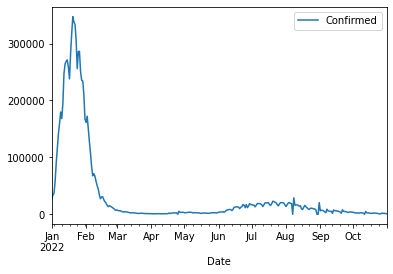

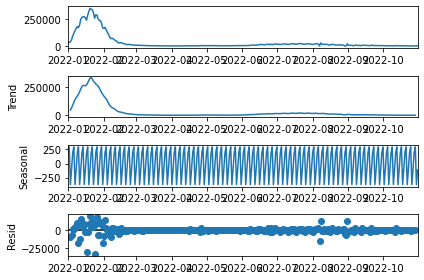

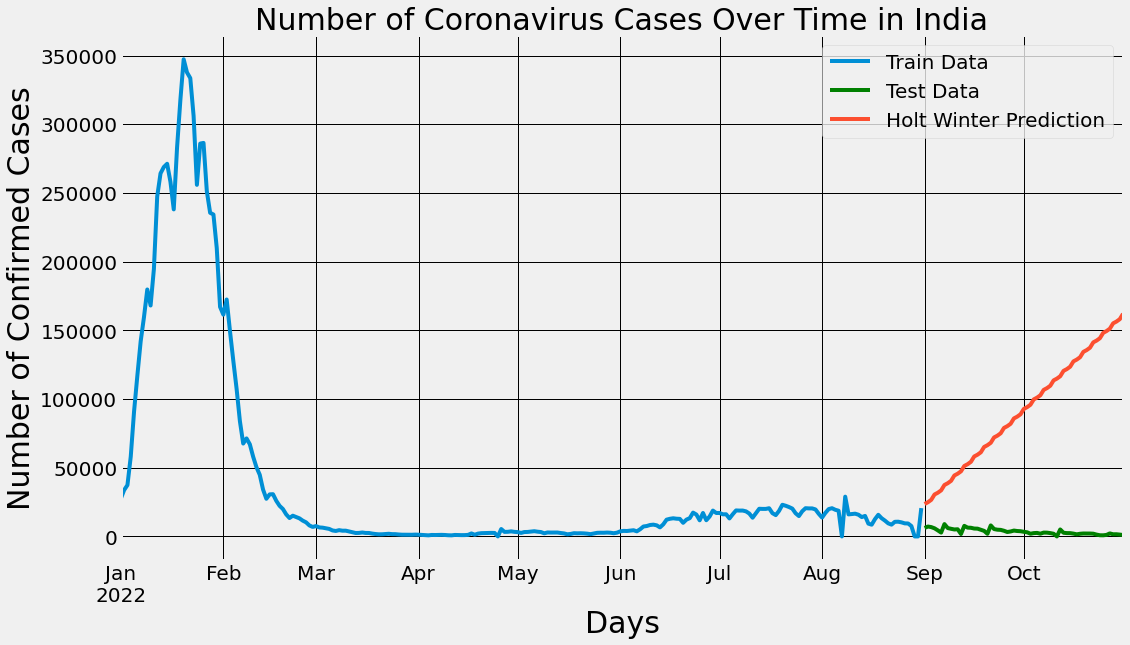

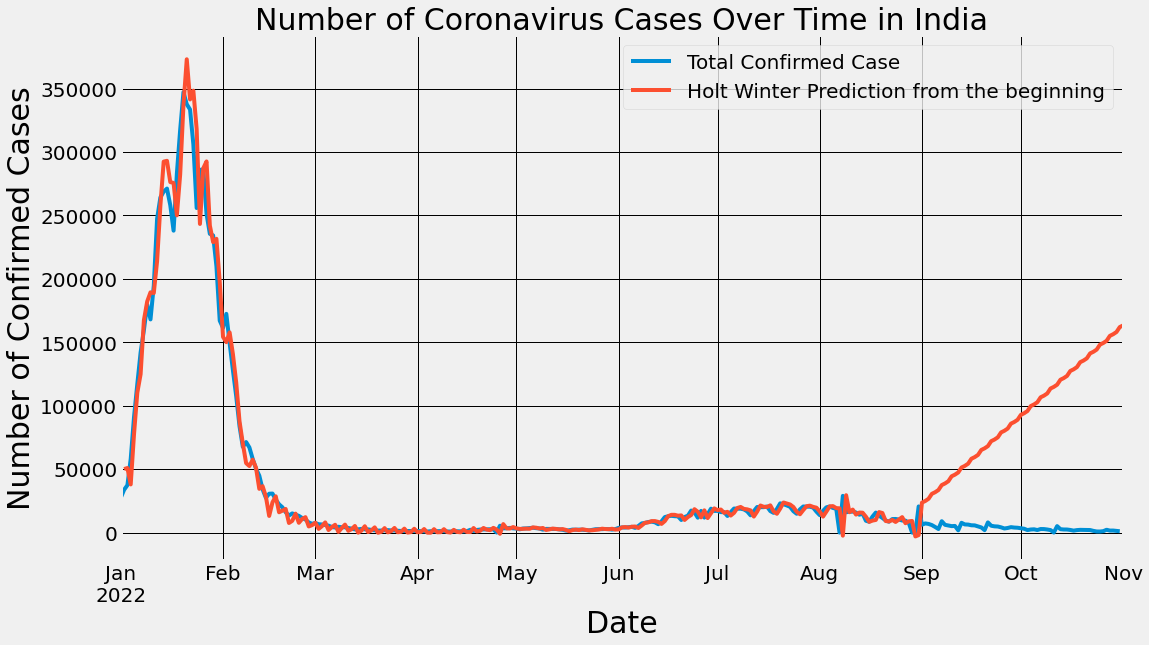

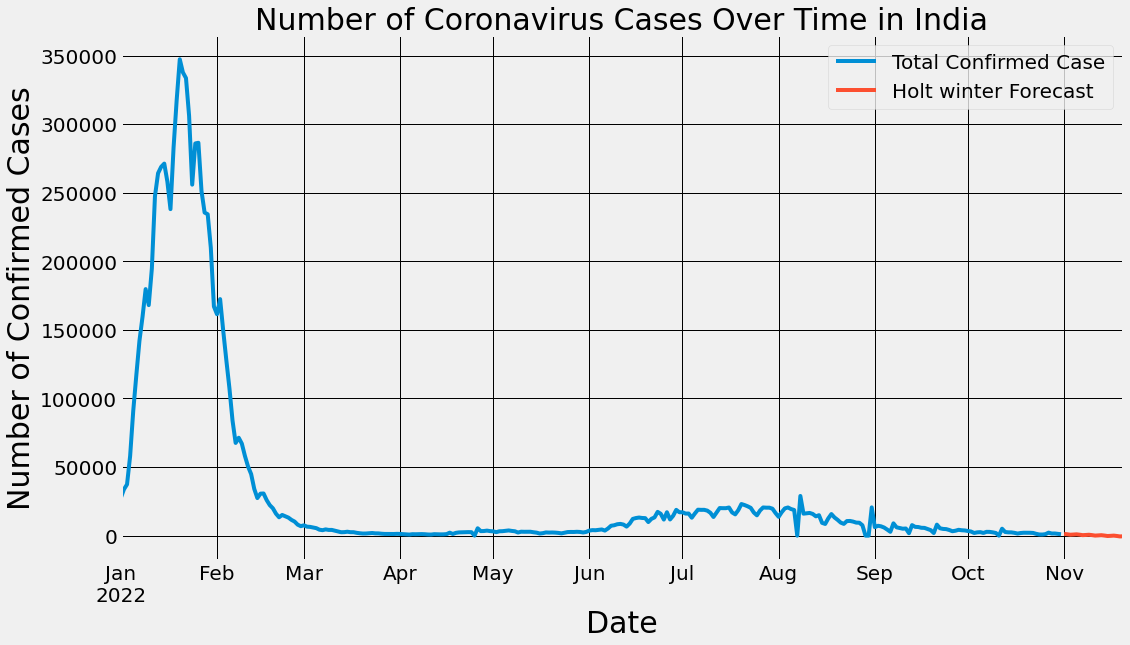

MAE: 88373.87622814874
MSE: 9596442265.402466
RMSE: 97961.43254057928
R^21 Score: -2294.1078819015697
f MAE: 20854.274090139857
f MSE: 2043267568.7948544
f RMSE: 45202.51728382894
f R^21 Score: 0.5905091691979607


In [6]:
 testcase,predtest_india,predfuture_india=Confirm(dfconfirmIndia,'Number of Coronavirus Cases Over Time in India','add','add','add')

In [7]:
 testcase

Confirmed
Date                 
2022-09-01       6168
2022-09-02       7219
2022-09-03       6809
2022-09-04       5910
2022-09-05       4417
...               ...
2022-10-27       2208
2022-10-28       1574
2022-10-29       1594
2022-10-30       1336
2022-10-31       1046

[61 rows x 1 columns]

In [8]:
predtest_india

Date  predict
0  2022-09-01    23607
1  2022-09-02    24896
2  2022-09-03    26624
3  2022-09-04    30528
4  2022-09-05    31816
..        ...      ...
56 2022-10-27   151194
57 2022-10-28   155097
58 2022-10-29   156386
59 2022-10-30   158114
60 2022-10-31   162018

[61 rows x 2 columns]

In [9]:
predfuture_india

Date  Future predict
0  2022-11-01            1294
1  2022-11-02            1026
2  2022-11-03             690
3  2022-11-04             820
4  2022-11-05             981
5  2022-11-06             712
6  2022-11-07             377
7  2022-11-08             507
8  2022-11-09             668
9  2022-11-10             399
10 2022-11-11              63
11 2022-11-12             194
12 2022-11-13             354
13 2022-11-14              86
14 2022-11-15             250
15 2022-11-16             119
16 2022-11-17              41
17 2022-11-18             228
18 2022-11-19             563
19 2022-11-20             433

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


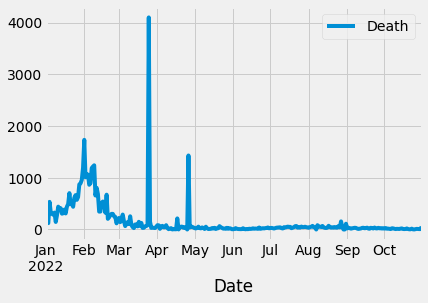

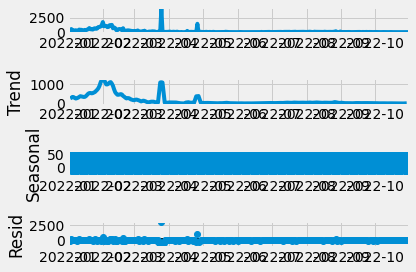

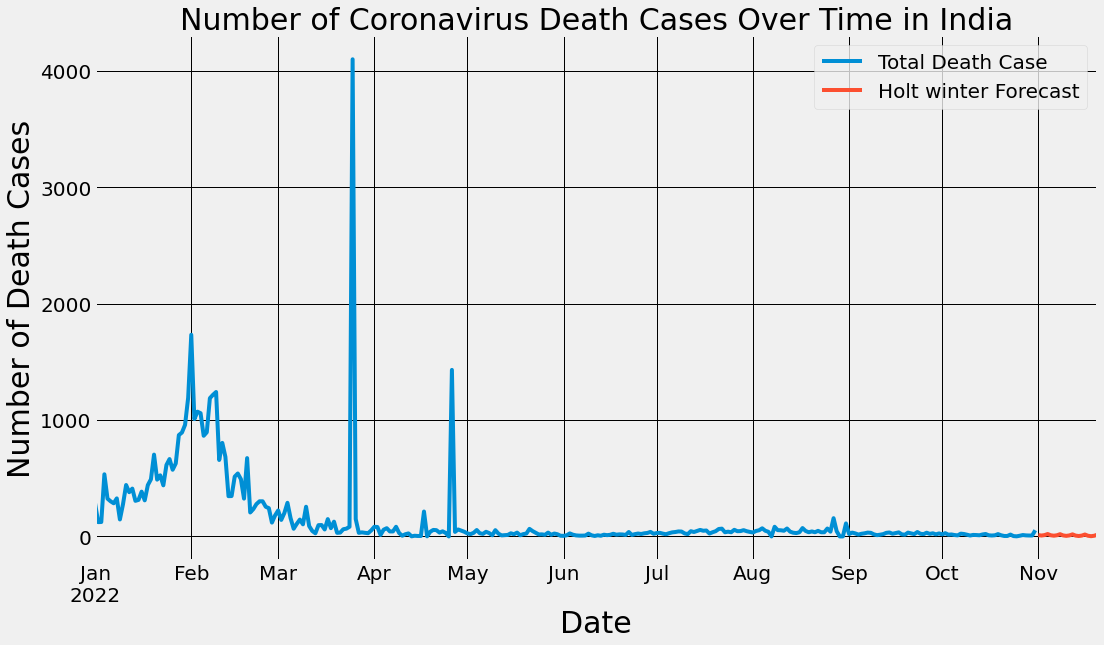

MAE: 48.69617956281684
MSE: 2661.0813274860448
RMSE: 51.58566978809178
R^21 Score: -25.419395136489115


In [10]:
testcase, predtest_indiaDeath,predfuture_indiaDeath=Death(dfDeathIndia,'Number of Coronavirus Death Cases Over Time in India','add','add','add')

In [11]:
testcase

Death
Date             
2022-09-01     21
2022-09-02     33
2022-09-03     26
2022-09-04     16
2022-09-05     23
...           ...
2022-10-27     12
2022-10-28      9
2022-10-29      8
2022-10-30      8
2022-10-31     53

[61 rows x 1 columns]

In [12]:
predtest_indiaDeath

Date  predict
0  2022-09-01       46
1  2022-09-02       57
2  2022-09-03       62
3  2022-09-04       47
4  2022-09-05       59
..        ...      ...
56 2022-10-27       86
57 2022-10-28       71
58 2022-10-29       83
59 2022-10-30       87
60 2022-10-31       72

[61 rows x 2 columns]

In [13]:
predfuture_indiaDeath

Date  Future predict
0  2022-11-01              11
1  2022-11-02               8
2  2022-11-03              12
3  2022-11-04              21
4  2022-11-05              10
5  2022-11-06               6
6  2022-11-07              10
7  2022-11-08              19
8  2022-11-09               9
9  2022-11-10               5
10 2022-11-11               9
11 2022-11-12              18
12 2022-11-13               7
13 2022-11-14               4
14 2022-11-15               7
15 2022-11-16              17
16 2022-11-17               6
17 2022-11-18               2
18 2022-11-19               6
19 2022-11-20              15

<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa

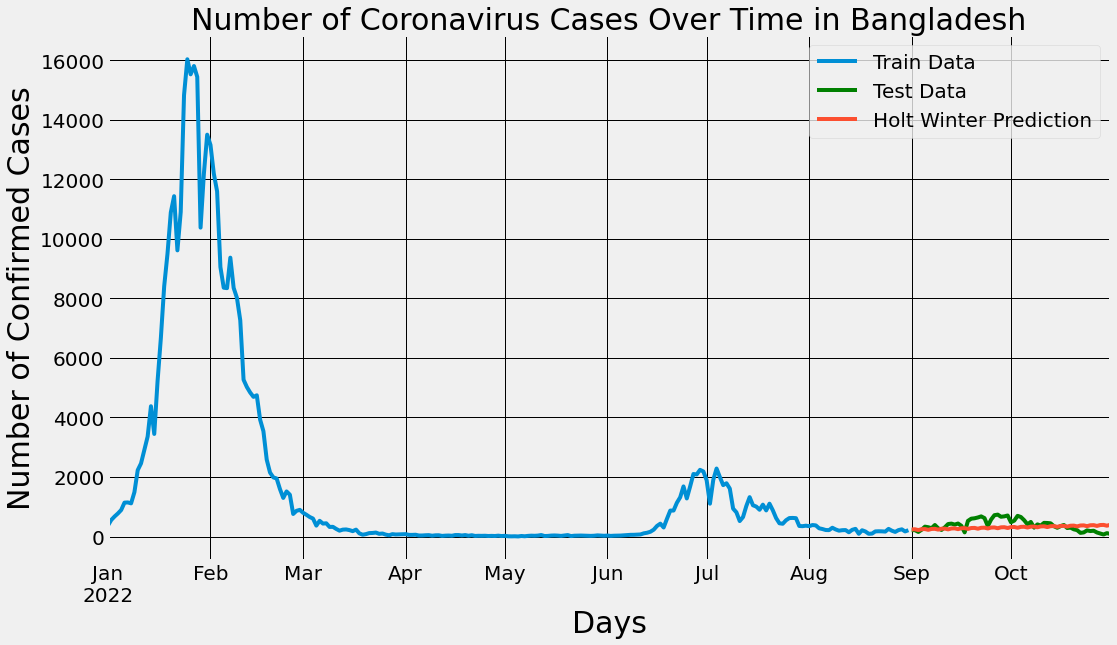

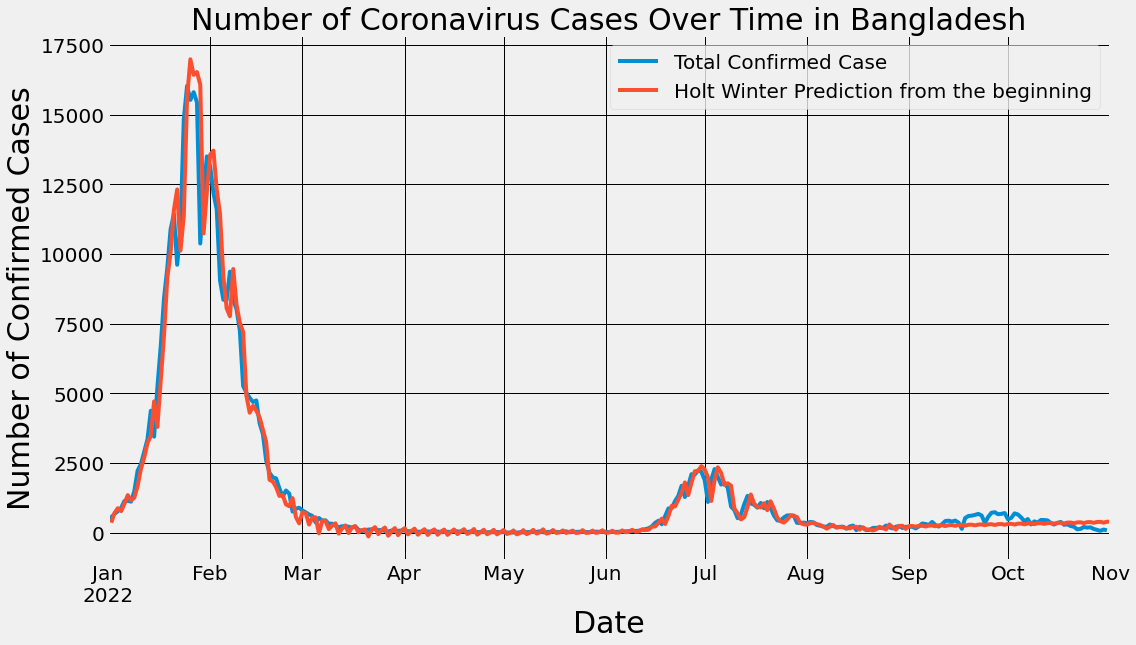

MAE: 176.2029378094788
MSE: 46935.46606967635
RMSE: 216.64594634951365
R^21 Score: -0.3583757436648678
f MAE: 140.64638641344396
f MSE: 50293.97226342106
f RMSE: 224.2631763429321
f R^21 Score: 0.9948386112223185


In [14]:
testcase,predtest_bd,predfuture_bd=Confirm(dfconfirmBangladesh,'Number of Coronavirus Cases Over Time in Bangladesh','add','add','add')

In [15]:
 testcase

Confirmed
Date                 
2022-09-01        216
2022-09-02        214
2022-09-03        155
2022-09-04        230
2022-09-05        333
...               ...
2022-10-27        137
2022-10-28        102
2022-10-29         69
2022-10-30        115
2022-10-31         88

[61 rows x 1 columns]

In [16]:
predtest_bd

Date  predict
0  2022-09-01      241
1  2022-09-02      245
2  2022-09-03      218
3  2022-09-04      248
4  2022-09-05      252
..        ...      ...
56 2022-10-27      357
57 2022-10-28      387
58 2022-10-29      391
59 2022-10-30      365
60 2022-10-31      395

[61 rows x 2 columns]

In [17]:
predfuture_bd

Date  Future predict
0  2022-11-01             105
1  2022-11-02              77
2  2022-11-03              32
3  2022-11-04              36
4  2022-11-05              52
5  2022-11-06              24
6  2022-11-07              21
7  2022-11-08              17
8  2022-11-09               2
9  2022-11-10              30
10 2022-11-11              74
11 2022-11-12              70
12 2022-11-13              55
13 2022-11-14              83
14 2022-11-15             127
15 2022-11-16             124
16 2022-11-17             108
17 2022-11-18             136
18 2022-11-19             181
19 2022-11-20             177

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


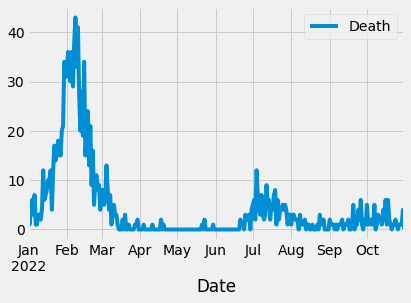

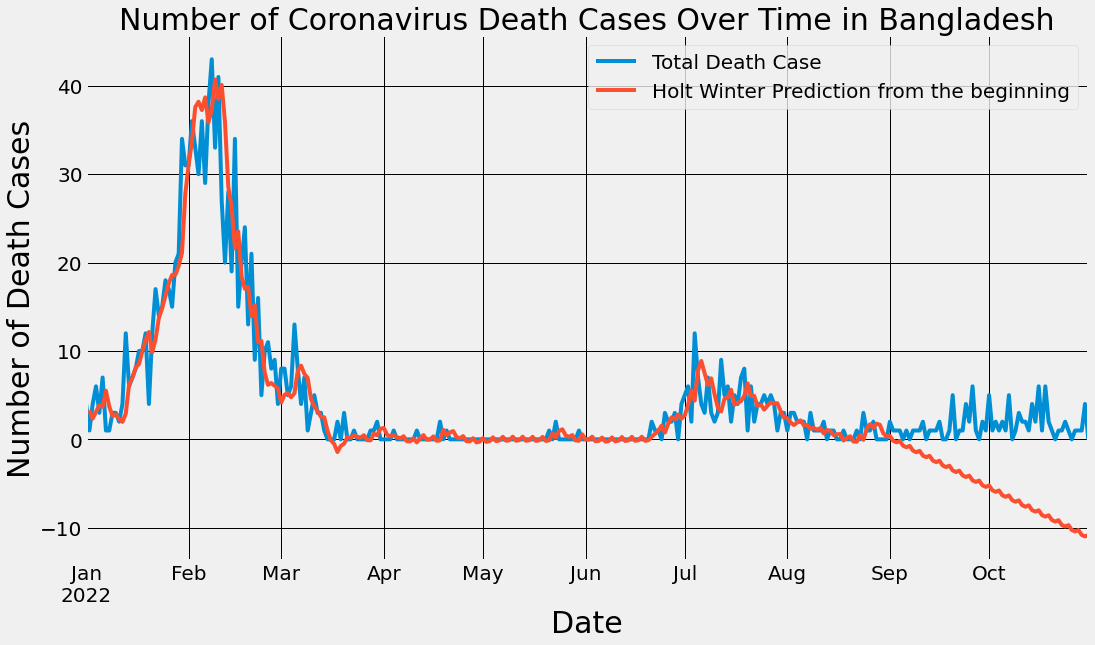

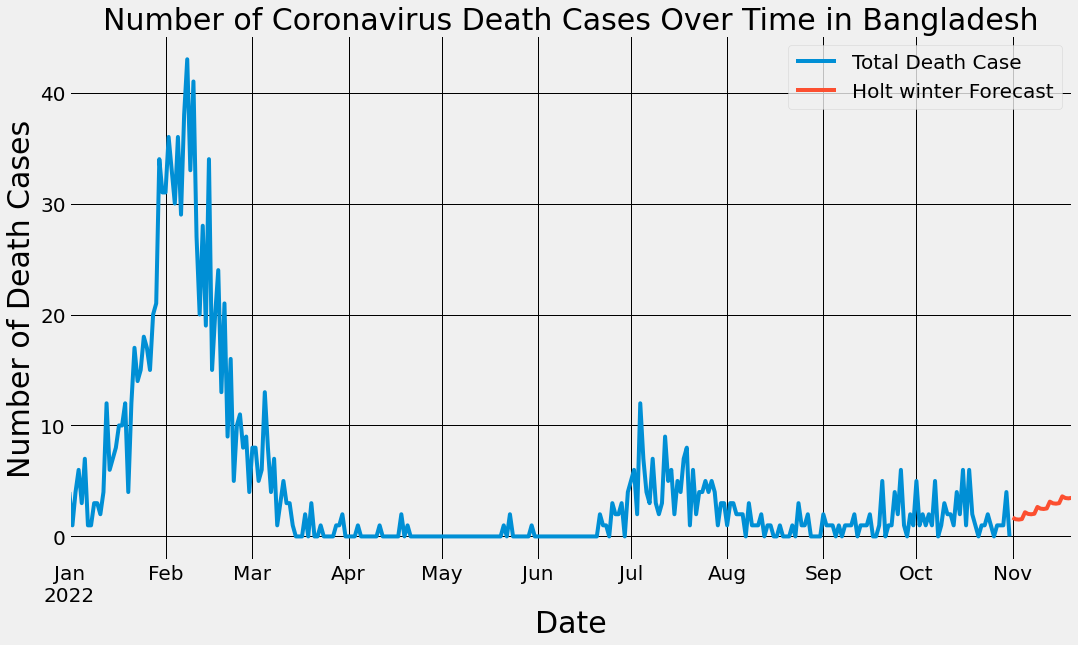

MAE: 7.089469885157375
MSE: 65.25164222893476
RMSE: 8.077848861481302
R^21 Score: -25.17522215759661


In [18]:
testcase,predtest_bd,predfuture_bd=Death(dfDeathBangladesh,'Number of Coronavirus Death Cases Over Time in Bangladesh','add','add','add')

In [19]:
testcase

Death
Date             
2022-09-01      2
2022-09-02      1
2022-09-03      1
2022-09-04      1
2022-09-05      0
...           ...
2022-10-27      1
2022-10-28      1
2022-10-29      1
2022-10-30      4
2022-10-31      0

[61 rows x 1 columns]

In [20]:
predtest_bd

Date  predict
0  2022-09-01        0
1  2022-09-02        0
2  2022-09-03        0
3  2022-09-04        0
4  2022-09-05        1
..        ...      ...
56 2022-10-27       10
57 2022-10-28       10
58 2022-10-29       11
59 2022-10-30       11
60 2022-10-31       11

[61 rows x 2 columns]

In [21]:
predfuture_bd

Date  Future predict
0  2022-11-01               2
1  2022-11-02               2
2  2022-11-03               2
3  2022-11-04               2
4  2022-11-05               2
5  2022-11-06               2
6  2022-11-07               2
7  2022-11-08               2
8  2022-11-09               3
9  2022-11-10               3
10 2022-11-11               2
11 2022-11-12               3
12 2022-11-13               3
13 2022-11-14               3
14 2022-11-15               3
15 2022-11-16               3
16 2022-11-17               4
17 2022-11-18               3
18 2022-11-19               3
19 2022-11-20               3

<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa

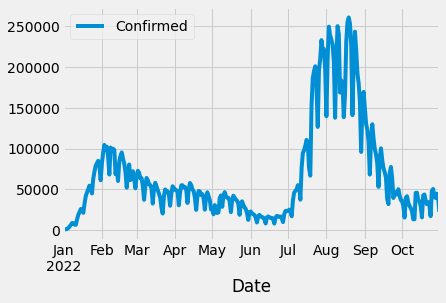

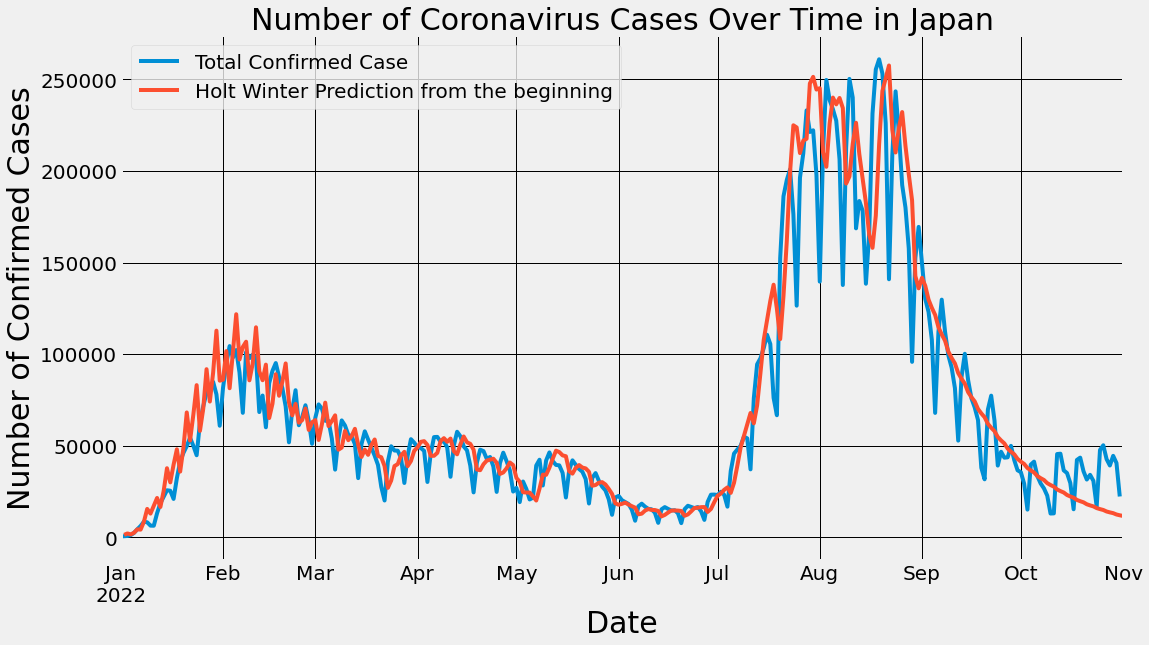

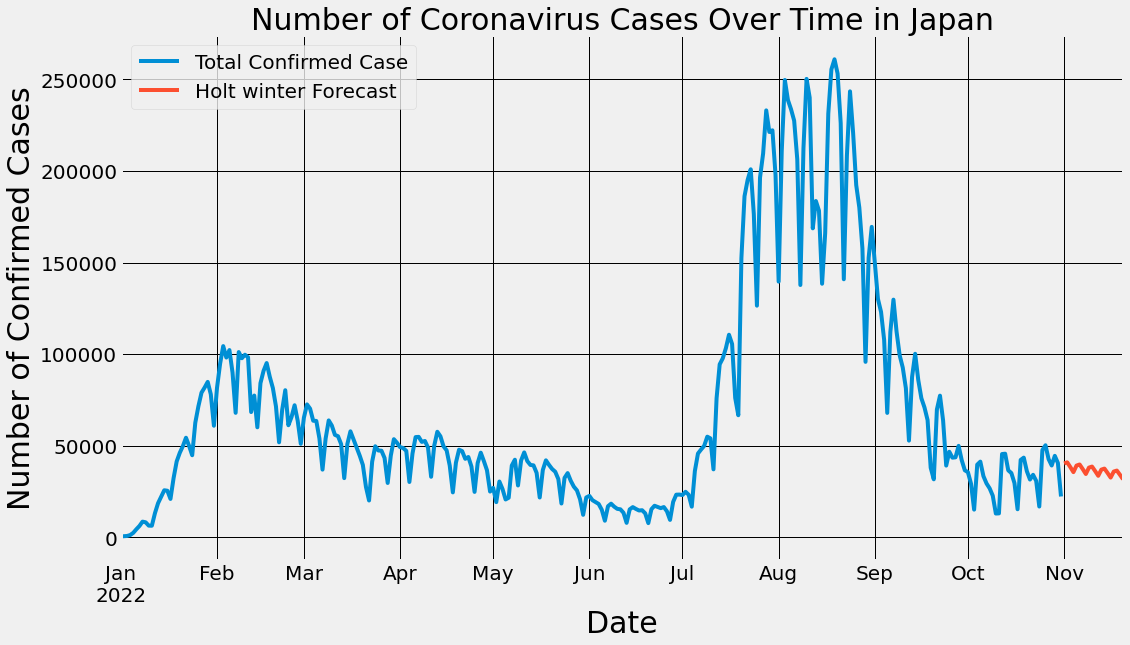

MAE: 13470.616406234958
MSE: 303946594.91740096
RMSE: 17434.064211118442
R^21 Score: 0.7112625914790947
f MAE: 11055.370551229533
f MSE: 286725881.13010144
f RMSE: 16932.98205072283
f R^21 Score: 0.9218990878194012


In [22]:
 testcase,predtest_japan,predfuture_japan=Confirm(dfconfirmJapan,'Number of Coronavirus Cases Over Time in Japan','mul','mul','mul')

In [23]:
 testcase

Confirmed
Date                 
2022-09-01     149836
2022-09-02     130182
2022-09-03     123112
2022-09-04     107819
2022-09-05      67962
...               ...
2022-10-27      42737
2022-10-28      39254
2022-10-29      44523
2022-10-30      40611
2022-10-31      22341

[61 rows x 1 columns]

In [24]:
predtest_japan

Date  predict
0  2022-09-01   141721
1  2022-09-02   137381
2  2022-09-03   129792
3  2022-09-04   125302
4  2022-09-05   121465
..        ...      ...
56 2022-10-27    14147
57 2022-10-28    13658
58 2022-10-29    13240
59 2022-10-30    12508
60 2022-10-31    12076

[61 rows x 2 columns]

In [25]:
predfuture_japan

Date  Future predict
0  2022-11-01           40366
1  2022-11-02           40983
2  2022-11-03           38389
3  2022-11-04           35642
4  2022-11-05           39212
5  2022-11-06           39811
6  2022-11-07           37292
7  2022-11-08           34623
8  2022-11-09           38090
9  2022-11-10           38673
10 2022-11-11           36225
11 2022-11-12           33633
12 2022-11-13           37001
13 2022-11-14           37567
14 2022-11-15           35190
15 2022-11-16           32671
16 2022-11-17           35943
17 2022-11-18           36493
18 2022-11-19           34183
19 2022-11-20           31737

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


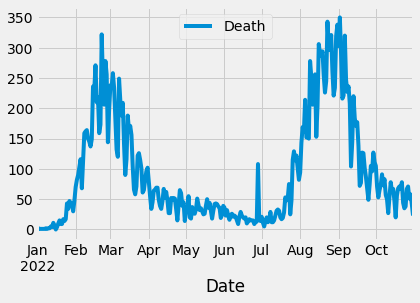

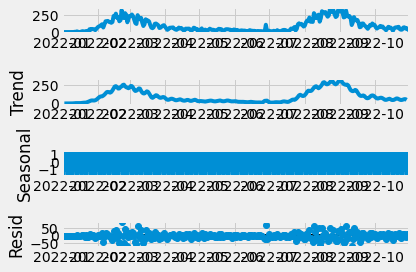

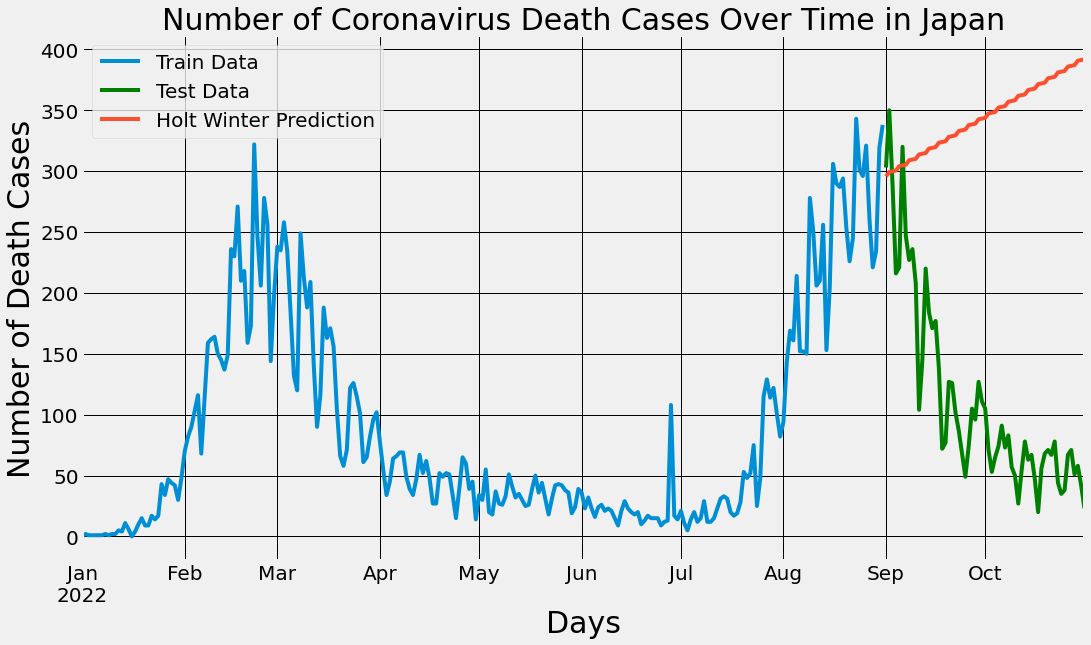

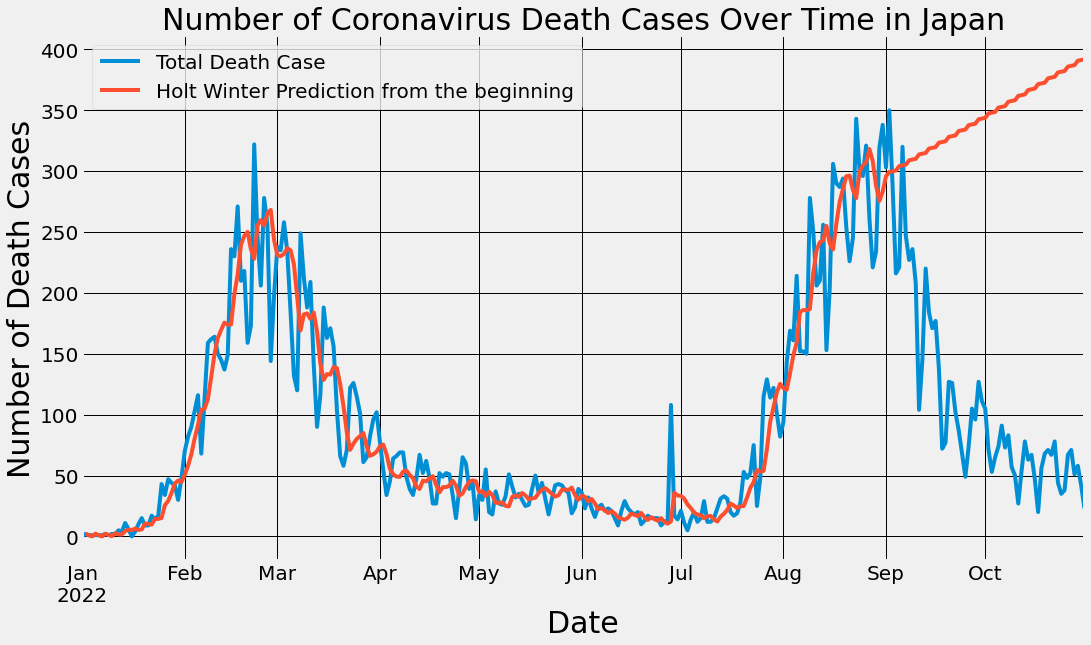

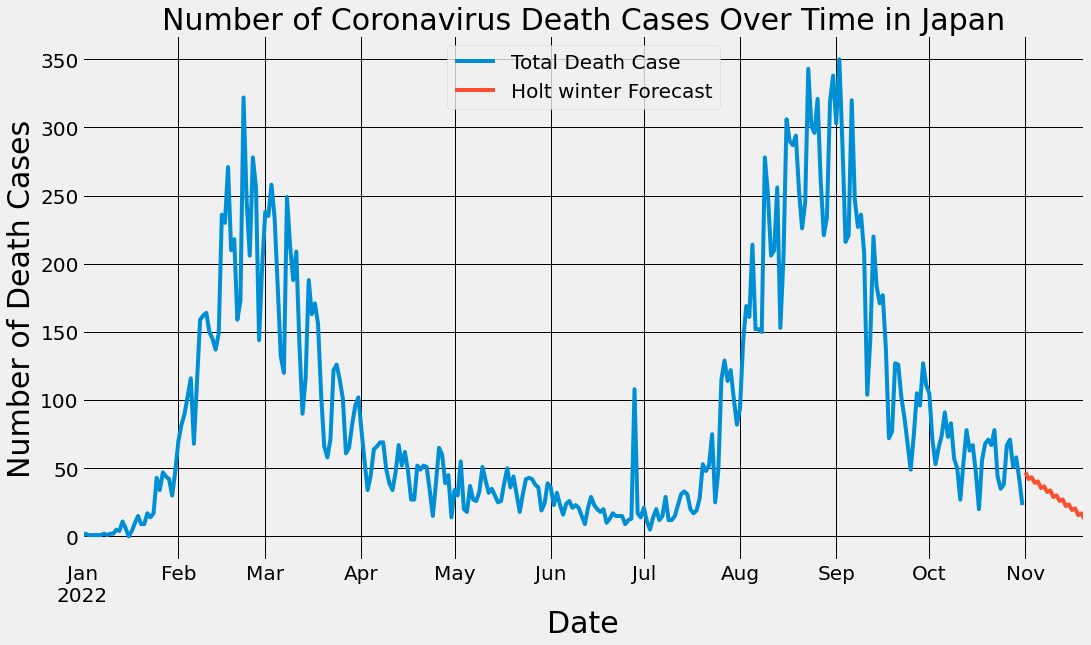

MAE: 235.33212262230353
MSE: 64973.999706089984
RMSE: 254.89997980794345
R^21 Score: -9.406494234198425


In [26]:
 testcase,predtest_japan,predfuture_japan=Death(dfDeathJapan,'Number of Coronavirus Death Cases Over Time in Japan','add','add','add')

In [27]:
 testcase

Death
Date             
2022-09-01    303
2022-09-02    350
2022-09-03    288
2022-09-04    216
2022-09-05    221
...           ...
2022-10-27     71
2022-10-28     51
2022-10-29     58
2022-10-30     42
2022-10-31     23

[61 rows x 1 columns]

In [28]:
predtest_japan

Date  predict
0  2022-09-01      296
1  2022-09-02      299
2  2022-09-03      300
3  2022-09-04      301
4  2022-09-05      304
..        ...      ...
56 2022-10-27      386
57 2022-10-28      387
58 2022-10-29      391
59 2022-10-30      391
60 2022-10-31      392

[61 rows x 2 columns]

In [29]:
predfuture_japan

Date  Future predict
0  2022-11-01              47
1  2022-11-02              42
2  2022-11-03              43
3  2022-11-04              39
4  2022-11-05              40
5  2022-11-06              36
6  2022-11-07              37
7  2022-11-08              33
8  2022-11-09              34
9  2022-11-10              29
10 2022-11-11              30
11 2022-11-12              26
12 2022-11-13              27
13 2022-11-14              22
14 2022-11-15              23
15 2022-11-16              19
16 2022-11-17              21
17 2022-11-18              16
18 2022-11-19              17
19 2022-11-20              13

<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa

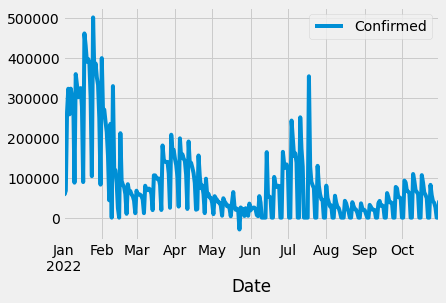

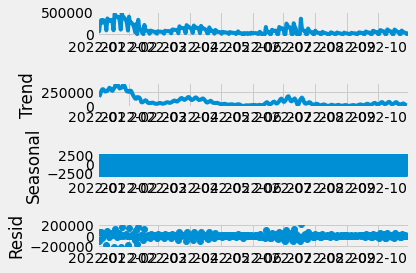

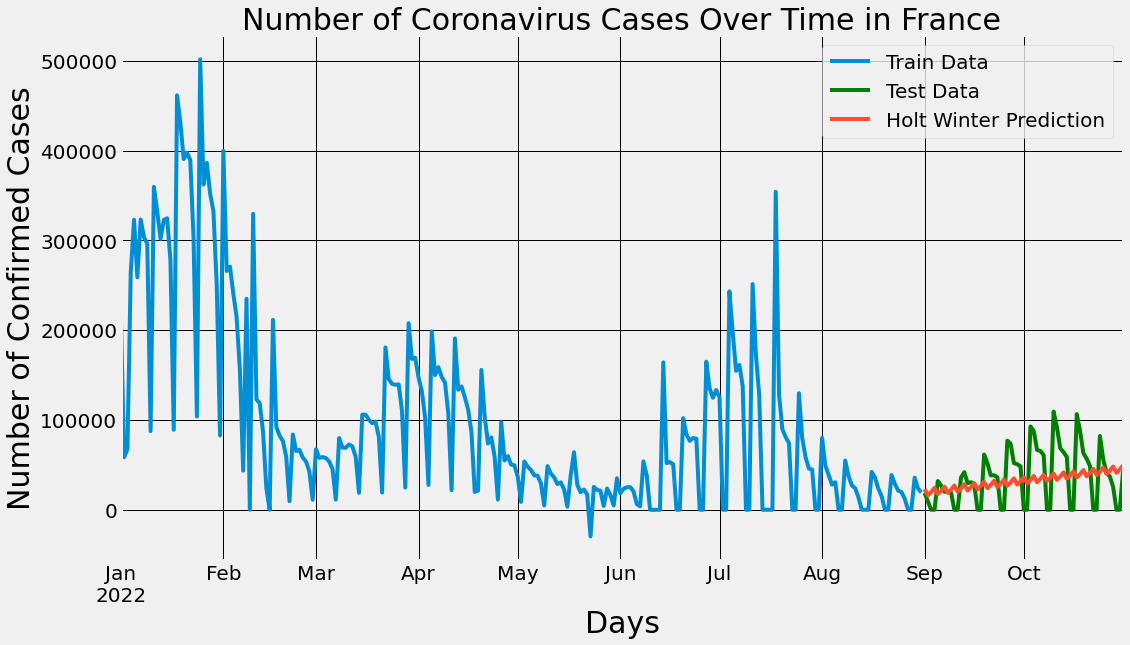

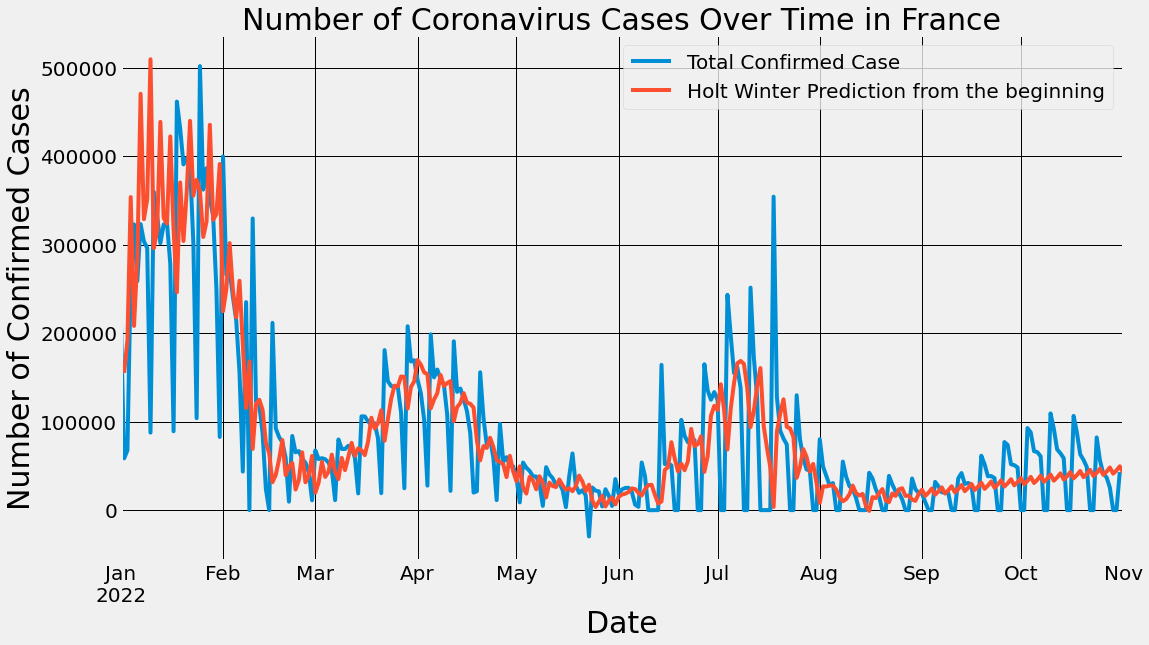

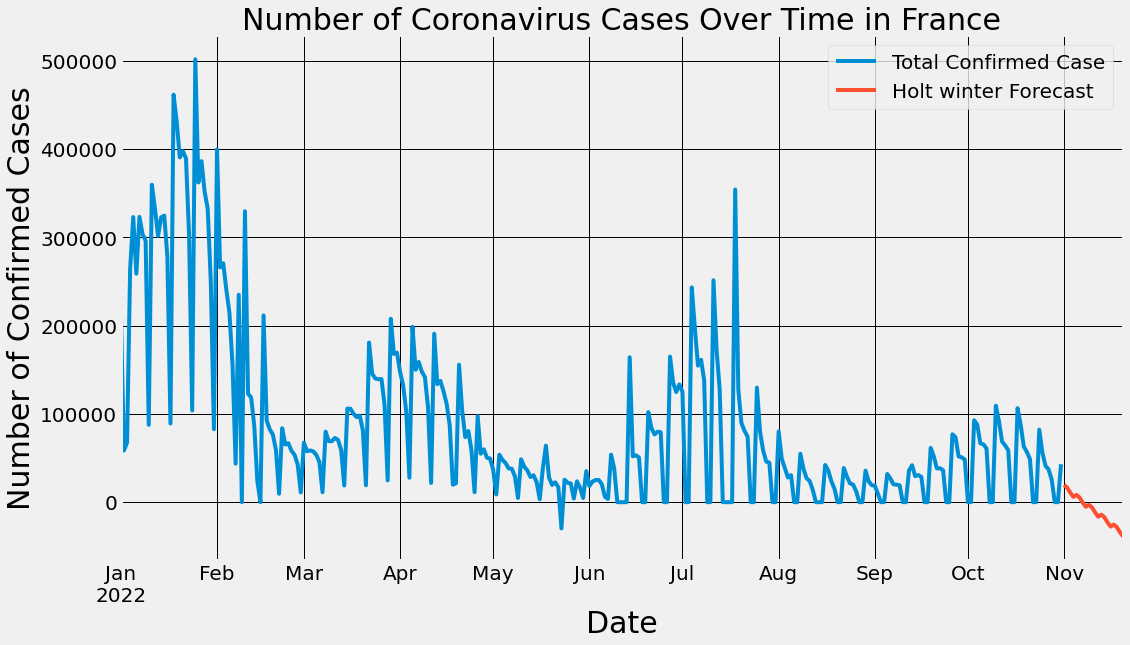

MAE: 25598.17988008889
MSE: 952087568.9569287
RMSE: 30855.9162715504
R^21 Score: 0.04522818421924546
f MAE: 35254.9257933784
f MSE: 3301385842.752533
f RMSE: 57457.687412151674
f R^21 Score: 0.6710188909711501


In [30]:
 testcase,predtest_france,predfuture_france=Confirm(dfconfirmFrance,'Number of Coronavirus Cases Over Time in France','add','add','add')

In [31]:
 testcase

Confirmed
Date                 
2022-09-01      18646
2022-09-02       9145
2022-09-03          0
2022-09-04          0
2022-09-05      31934
...               ...
2022-10-27      37089
2022-10-28      25415
2022-10-29          0
2022-10-30          0
2022-10-31      42947

[61 rows x 1 columns]

In [32]:
predtest_france


Date  predict
0  2022-09-01    23086
1  2022-09-02    16072
2  2022-09-03    19743
3  2022-09-04    24406
4  2022-09-05    17392
..        ...      ...
56 2022-10-27    43508
57 2022-10-28    48172
58 2022-10-29    41158
59 2022-10-30    44829
60 2022-10-31    49492

[61 rows x 2 columns]

In [33]:
predfuture_france

Date  Future predict
0  2022-11-01           19457
1  2022-11-02           16427
2  2022-11-03           10691
3  2022-11-04            6000
4  2022-11-05            8253
5  2022-11-06            5222
6  2022-11-07             514
7  2022-11-08            5205
8  2022-11-09            2952
9  2022-11-10            5983
10 2022-11-11           11719
11 2022-11-12           16410
12 2022-11-13           14157
13 2022-11-14           17187
14 2022-11-15           22924
15 2022-11-16           27614
16 2022-11-17           25362
17 2022-11-18           28392
18 2022-11-19           34128
19 2022-11-20           38819

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


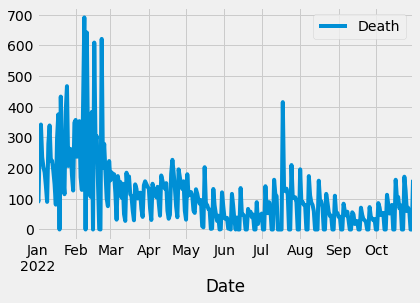

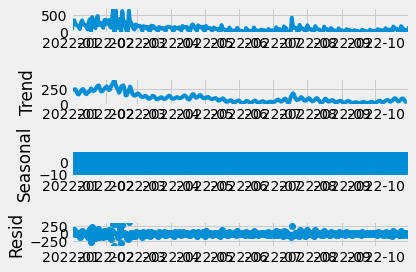

MAE: 39.12623671807298
MSE: 2960.6919017888445
RMSE: 54.412240367300114
R^21 Score: -0.6019345482014467


In [34]:
 testcase,predtest_france,predfuture_france=Death(dfDeathFrance,'Number of Coronavirus Death Cases Over Time in France','add','add','add')

In [35]:
 testcase

Death
Date             
2022-09-01     41
2022-09-02     42
2022-09-03      0
2022-09-04      0
2022-09-05     84
...           ...
2022-10-27     71
2022-10-28     60
2022-10-29      0
2022-10-30      0
2022-10-31    162

[61 rows x 1 columns]

In [36]:
predtest_france

Date  predict
0  2022-09-01       54
1  2022-09-02       34
2  2022-09-03       46
3  2022-09-04       52
4  2022-09-05       32
..        ...      ...
56 2022-10-27        6
57 2022-10-28       12
58 2022-10-29        8
59 2022-10-30        4
60 2022-10-31       10

[61 rows x 2 columns]

In [37]:
predfuture_france

Date  Future predict
0  2022-11-01              67
1  2022-11-02              66
2  2022-11-03              51
3  2022-11-04              56
4  2022-11-05              67
5  2022-11-06              65
6  2022-11-07              51
7  2022-11-08              55
8  2022-11-09              66
9  2022-11-10              65
10 2022-11-11              50
11 2022-11-12              55
12 2022-11-13              66
13 2022-11-14              64
14 2022-11-15              49
15 2022-11-16              54
16 2022-11-17              65
17 2022-11-18              64
18 2022-11-19              49
19 2022-11-20              54

<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa

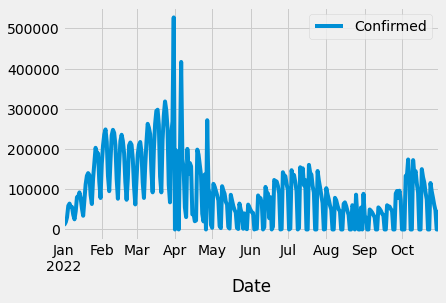

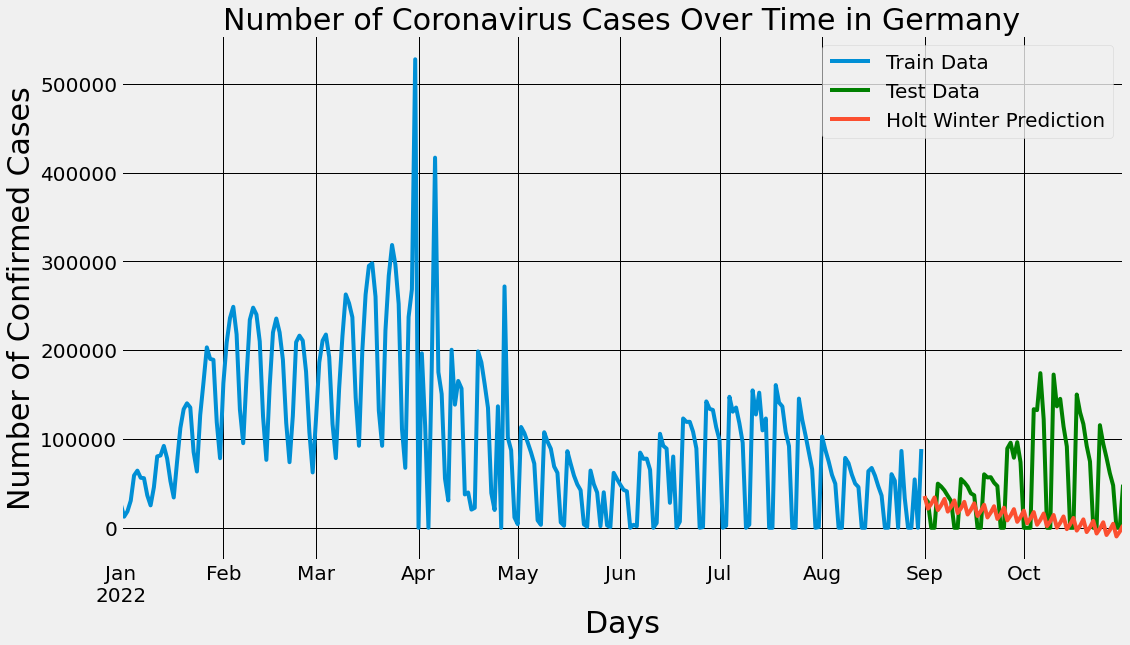

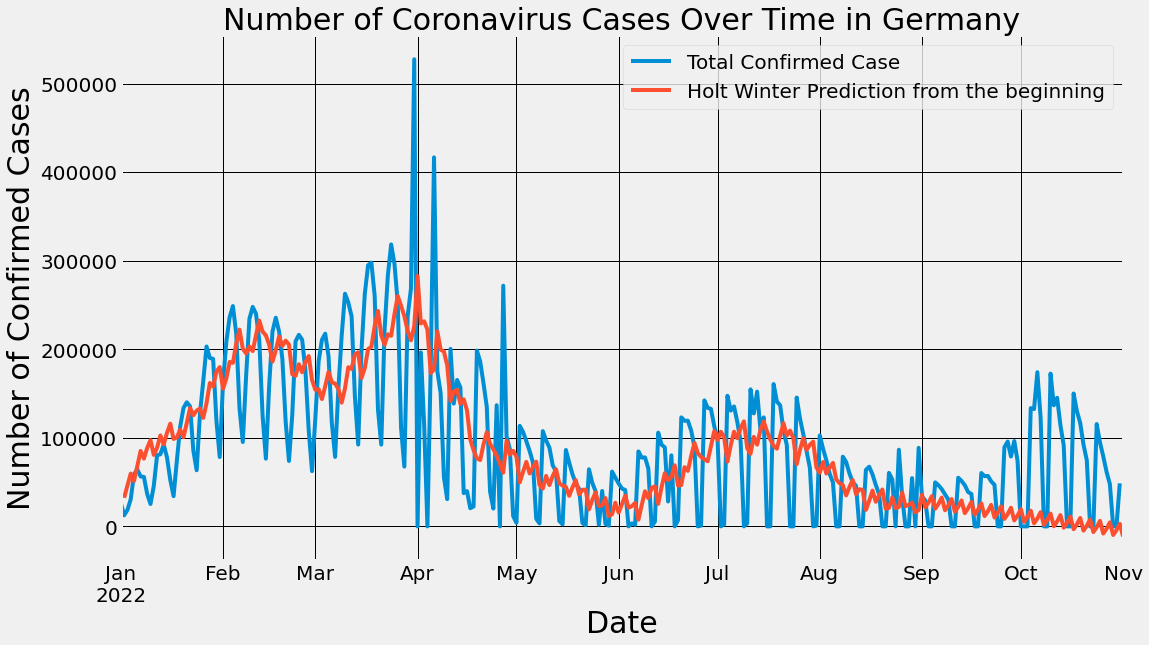

MAE: 52108.711351076825
MSE: 4909267834.350124
RMSE: 70066.16754433002
R^21 Score: -0.9125508517343388
f MAE: 45246.698663983334
f MSE: 3606276767.2297354
f RMSE: 60052.28361377888
f R^21 Score: 0.45810176242809175


In [38]:
 testcase,predtest_Germany,predfuture_Germany=Confirm(dfconfirmGermany,'Number of Coronavirus Cases Over Time in Germany','add','add','add')

In [39]:
 testcase

Confirmed
Date                 
2022-09-01      33930
2022-09-02      29345
2022-09-03          0
2022-09-04          0
2022-09-05      49709
...               ...
2022-10-27      61492
2022-10-28      47718
2022-10-29          0
2022-10-30          1
2022-10-31      48556

[61 rows x 1 columns]

In [40]:
predtest_Germany


Date  predict
0  2022-09-01    35804
1  2022-09-02    21528
2  2022-09-03    26985
3  2022-09-04    34159
4  2022-09-05    19883
..        ...      ...
56 2022-10-27     2621
57 2022-10-28     4552
58 2022-10-29     9723
59 2022-10-30     4266
60 2022-10-31     2907

[61 rows x 2 columns]

In [41]:
predfuture_Germany

Date  Future predict
0  2022-11-01           53948
1  2022-11-02           38428
2  2022-11-03           42604
3  2022-11-04           52835
4  2022-11-05           46999
5  2022-11-06           31480
6  2022-11-07           35655
7  2022-11-08           45887
8  2022-11-09           40051
9  2022-11-10           24532
10 2022-11-11           28707
11 2022-11-12           38938
12 2022-11-13           33103
13 2022-11-14           17583
14 2022-11-15           21759
15 2022-11-16           31990
16 2022-11-17           26154
17 2022-11-18           10635
18 2022-11-19           14810
19 2022-11-20           25042

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


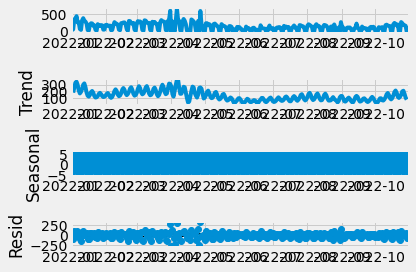

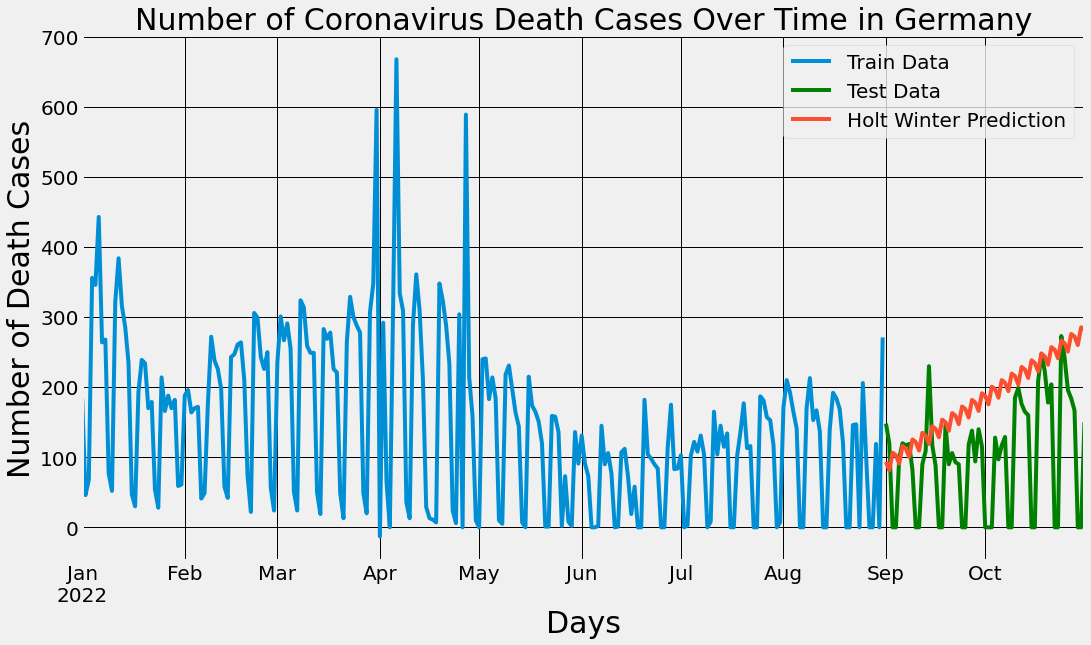

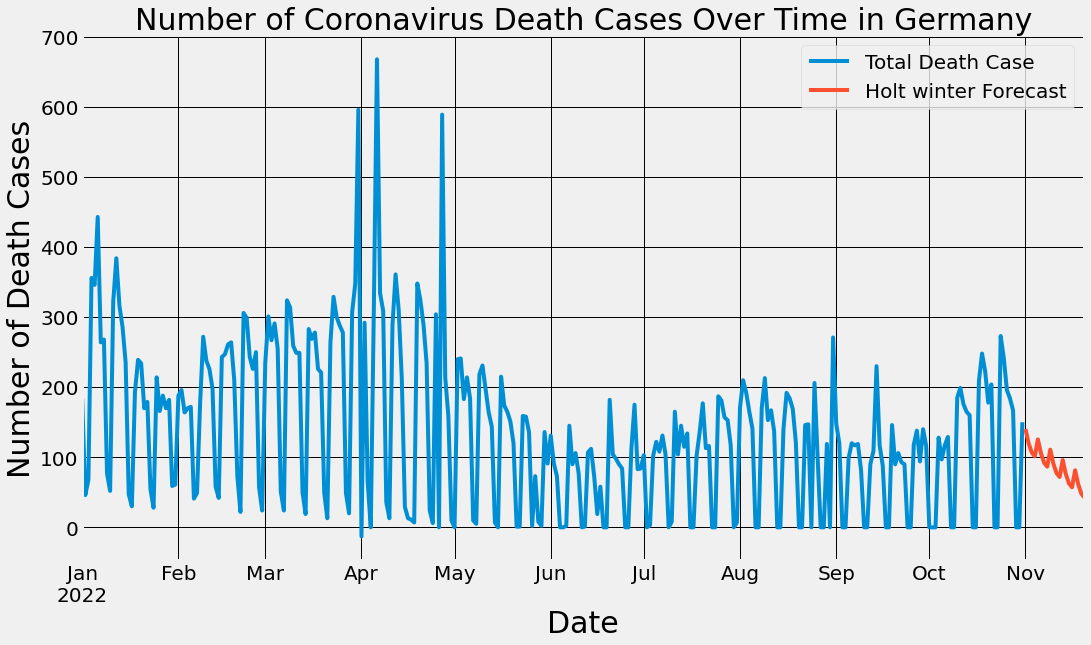

MAE: 91.2882819921564
MSE: 14137.430758073544
RMSE: 118.90092833142029
R^21 Score: -1.2157384507722386


In [42]:
 testcase,predtest_Germany,predfuture_Germany=Death(dfDeathGermany,'Number of Coronavirus Death Cases Over Time in Germany','add','add','add')

In [43]:
 testcase

Death
Date             
2022-09-01    148
2022-09-02    120
2022-09-03      0
2022-09-04      0
2022-09-05     99
...           ...
2022-10-27    184
2022-10-28    167
2022-10-29      0
2022-10-30      0
2022-10-31    150

[61 rows x 1 columns]

In [44]:
predtest_Germany

Date  predict
0  2022-09-01       93
1  2022-09-02       81
2  2022-09-03      107
3  2022-09-04      103
4  2022-09-05       91
..        ...      ...
56 2022-10-27      276
57 2022-10-28      272
58 2022-10-29      260
59 2022-10-30      285
60 2022-10-31      282

[61 rows x 2 columns]

In [45]:
predfuture_Germany

Date  Future predict
0  2022-11-01             140
1  2022-11-02             120
2  2022-11-03             107
3  2022-11-04             101
4  2022-11-05             126
5  2022-11-06             105
6  2022-11-07              92
7  2022-11-08              87
8  2022-11-09             111
9  2022-11-10              91
10 2022-11-11              77
11 2022-11-12              72
12 2022-11-13              96
13 2022-11-14              76
14 2022-11-15              63
15 2022-11-16              57
16 2022-11-17              81
17 2022-11-18              61
18 2022-11-19              48
19 2022-11-20              42

<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa

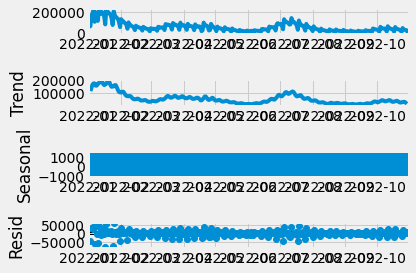

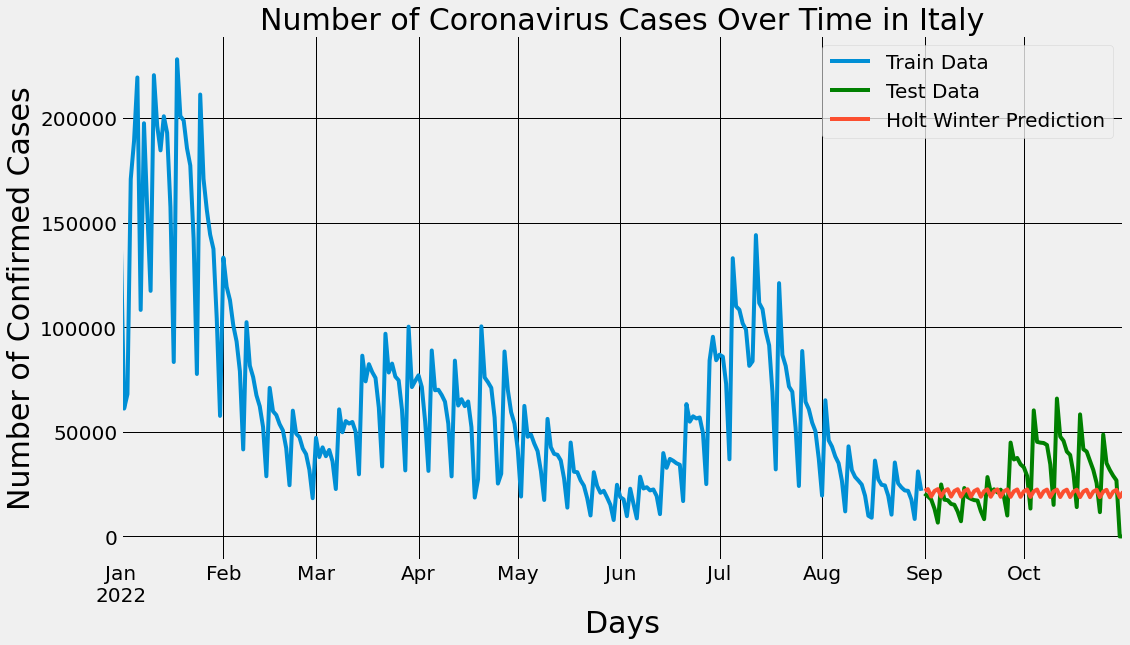

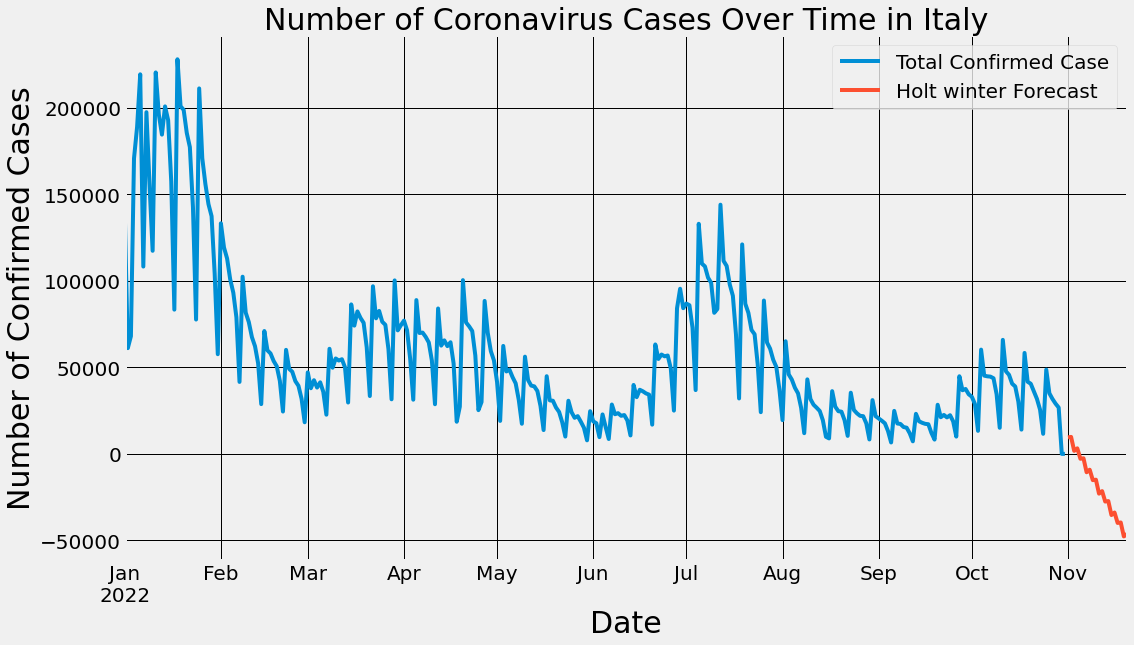

MAE: 12565.451638004168
MSE: 257750723.93064398
RMSE: 16054.616903889173
R^21 Score: -0.19365504005689527
f MAE: 13790.638772835862
f MSE: 470295066.8669795
f RMSE: 21686.287530764213
f R^21 Score: 0.7744645891420829


In [46]:
 testcase,predtest,predfuture=Confirm(dfconfirmItaly,'Number of Coronavirus Cases Over Time in Italy','add','add','add')

In [47]:
 testcase

Confirmed
Date                 
2022-09-01      20498
2022-09-02      19158
2022-09-03      17660
2022-09-04      13196
2022-09-05       6608
...               ...
2022-10-27      31758
2022-10-28      29037
2022-10-29      26799
2022-10-30          0
2022-10-31          0

[61 rows x 1 columns]

In [48]:
predtest


Date  predict
0  2022-09-01    21762
1  2022-09-02    22635
2  2022-09-03    19093
3  2022-09-04    21743
4  2022-09-05    22616
..        ...      ...
56 2022-10-27    18751
57 2022-10-28    21401
58 2022-10-29    22273
59 2022-10-30    18732
60 2022-10-31    21382

[61 rows x 2 columns]

In [49]:
predfuture

Date  Future predict
0  2022-11-01            9559
1  2022-11-02            9812
2  2022-11-03            1745
3  2022-11-04            3215
4  2022-11-05            2809
5  2022-11-06            2555
6  2022-11-07           10622
7  2022-11-08            9152
8  2022-11-09           15176
9  2022-11-10           14922
10 2022-11-11           22989
11 2022-11-12           21520
12 2022-11-13           27543
13 2022-11-14           27290
14 2022-11-15           35357
15 2022-11-16           33887
16 2022-11-17           39910
17 2022-11-18           39657
18 2022-11-19           47724
19 2022-11-20           46254

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


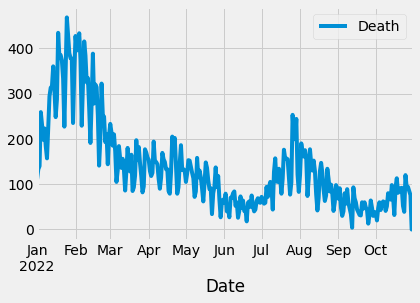

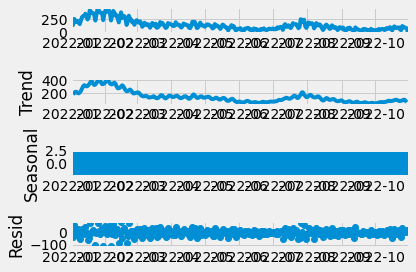

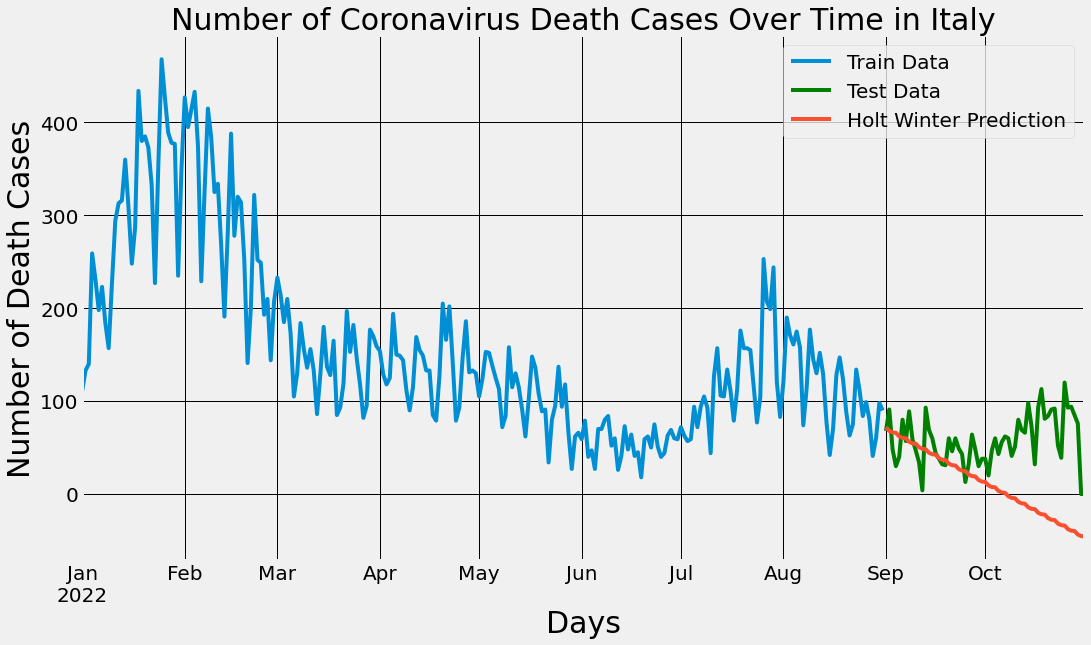

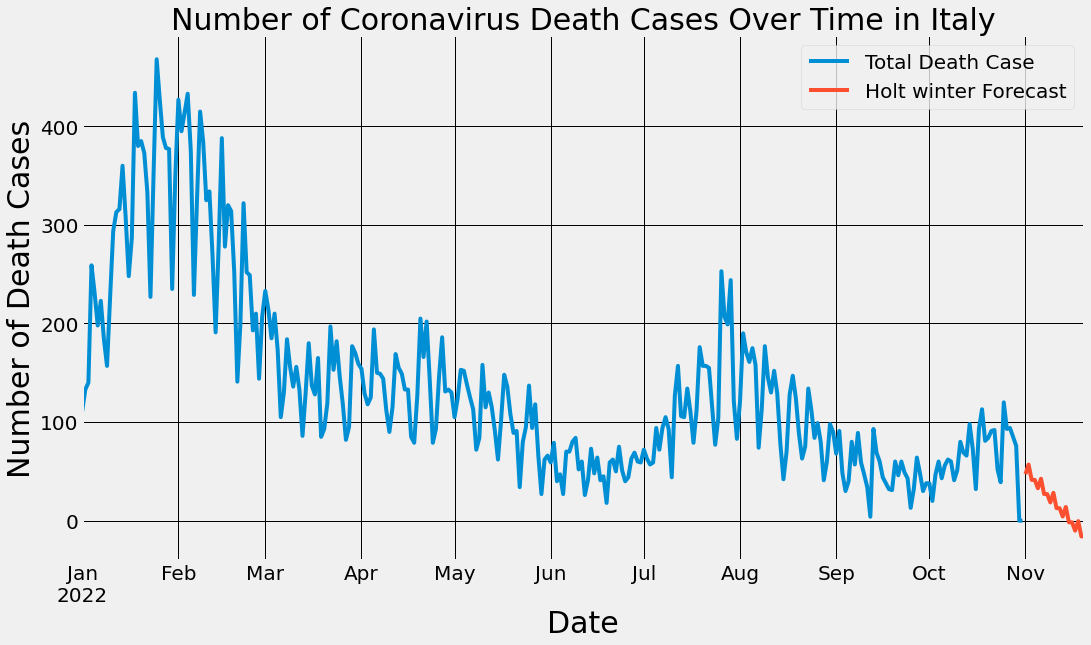

MAE: 51.25037546716079
MSE: 4394.942722984482
RMSE: 66.2943641871953
R^21 Score: -5.200193916354486


In [50]:
 testcase,predtest,predfuture=Death(dfDeathItaly,'Number of Coronavirus Death Cases Over Time in Italy','add','add','add')

In [51]:
 testcase

Death
Date             
2022-09-01     68
2022-09-02     91
2022-09-03     48
2022-09-04     30
2022-09-05     40
...           ...
2022-10-27     94
2022-10-28     85
2022-10-29     76
2022-10-30      0
2022-10-31      0

[61 rows x 1 columns]

In [52]:
predtest

Date  predict
0  2022-09-01       72
1  2022-09-02       68
2  2022-09-03       66
3  2022-09-04       66
4  2022-09-05       62
..        ...      ...
56 2022-10-27       39
57 2022-10-28       40
58 2022-10-29       44
59 2022-10-30       45
60 2022-10-31       46

[61 rows x 2 columns]

In [53]:
predfuture

Date  Future predict
0  2022-11-01              47
1  2022-11-02              57
2  2022-11-03              41
3  2022-11-04              41
4  2022-11-05              33
5  2022-11-06              43
6  2022-11-07              27
7  2022-11-08              27
8  2022-11-09              19
9  2022-11-10              28
10 2022-11-11              13
11 2022-11-12              13
12 2022-11-13               4
13 2022-11-14              14
14 2022-11-15               2
15 2022-11-16               2
16 2022-11-17              10
17 2022-11-18               0
18 2022-11-19              16
19 2022-11-20              16

<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa

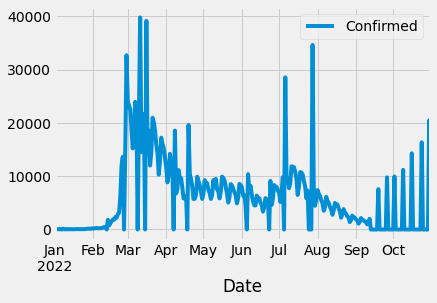

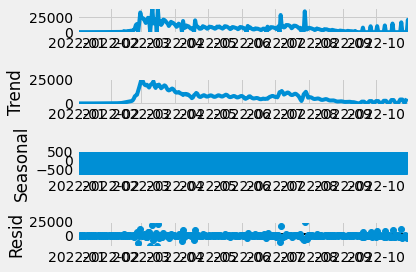

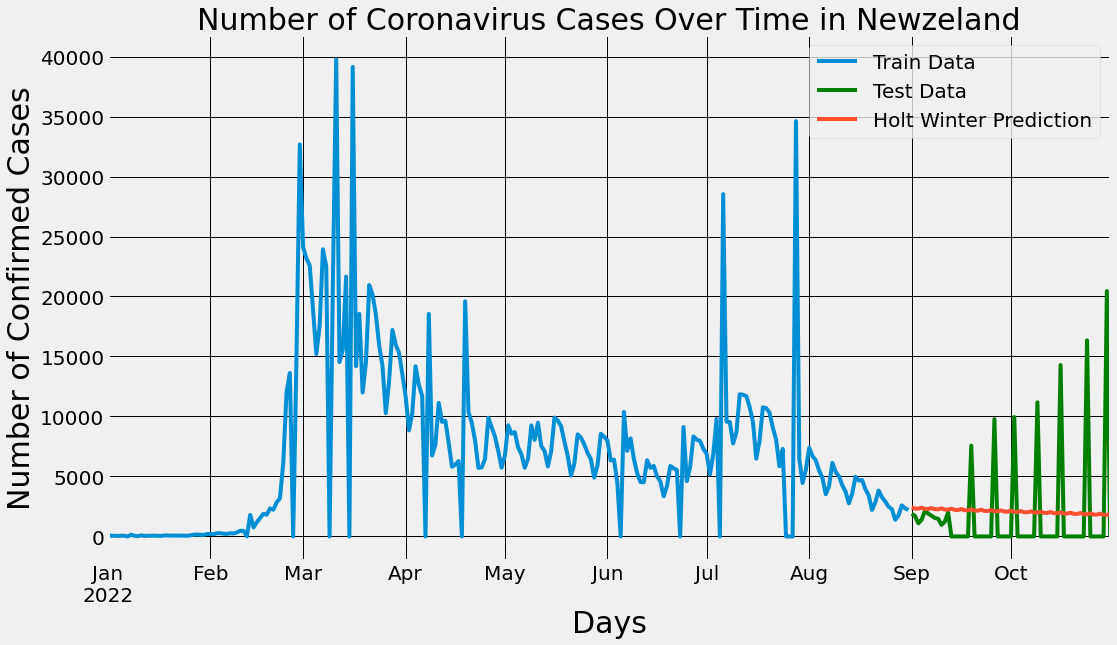

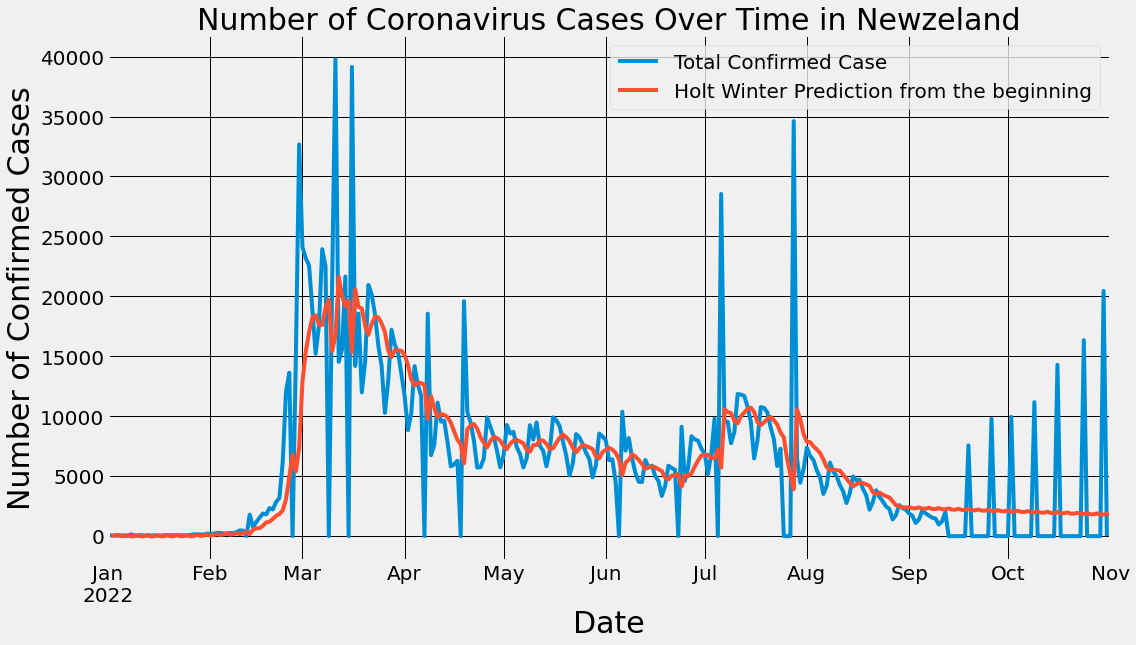

MAE: 2782.591729379559
MSE: 18463864.585149094
RMSE: 4296.959923614496
R^21 Score: -0.019344380714808596
f MAE: 2118.7246180992743
f MSE: 16034102.461234638
f RMSE: 4004.260538630652
f R^21 Score: 0.6536664823606433


In [54]:
 testcase,predtest,predfuture=Confirm(dfconfirmNewzeland,'Number of Coronavirus Cases Over Time in Newzeland','add','add','add')

In [55]:
 testcase

Confirmed
Date                 
2022-09-01       1895
2022-09-02       1703
2022-09-03       1099
2022-09-04       1400
2022-09-05       2145
...               ...
2022-10-27          0
2022-10-28          0
2022-10-29          0
2022-10-30      20456
2022-10-31          0

[61 rows x 1 columns]

In [56]:
predtest


Date  predict
0  2022-09-01     2421
1  2022-09-02     2323
2  2022-09-03     2318
3  2022-09-04     2393
4  2022-09-05     2295
..        ...      ...
56 2022-10-27     1820
57 2022-10-28     1895
58 2022-10-29     1797
59 2022-10-30     1792
60 2022-10-31     1867

[61 rows x 2 columns]

In [57]:
predfuture

Date  Future predict
0  2022-11-01            4004
1  2022-11-02            3912
2  2022-11-03            3926
3  2022-11-04            3894
4  2022-11-05            4000
5  2022-11-06            3909
6  2022-11-07            3923
7  2022-11-08            3890
8  2022-11-09            3997
9  2022-11-10            3905
10 2022-11-11            3920
11 2022-11-12            3887
12 2022-11-13            3994
13 2022-11-14            3902
14 2022-11-15            3916
15 2022-11-16            3884
16 2022-11-17            3991
17 2022-11-18            3899
18 2022-11-19            3913
19 2022-11-20            3881

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


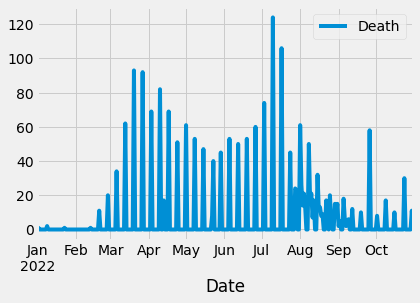

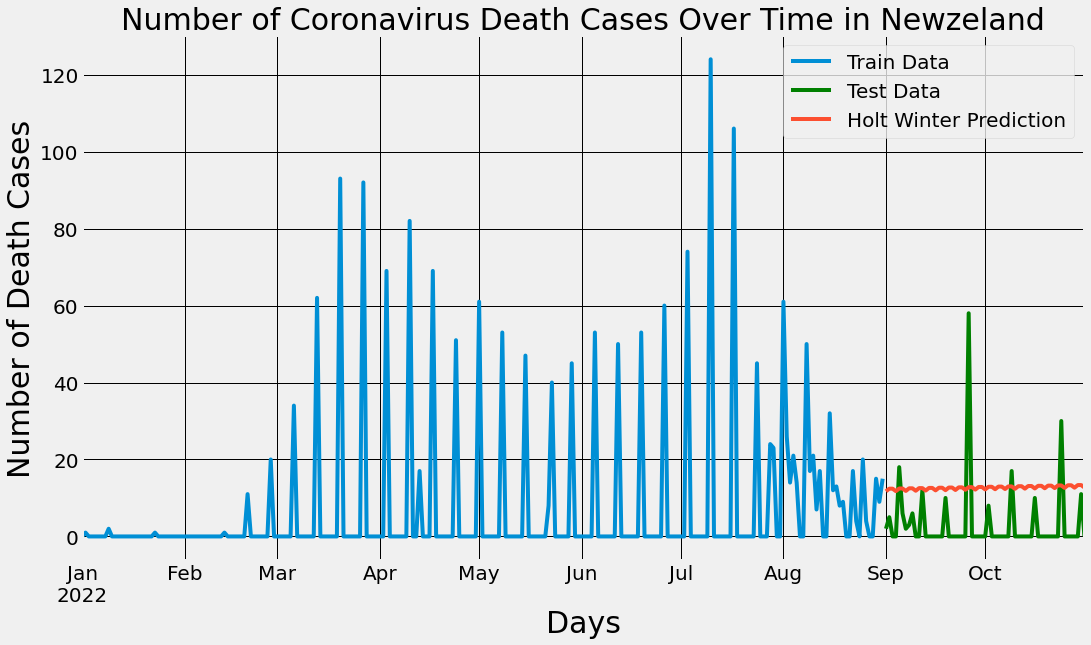

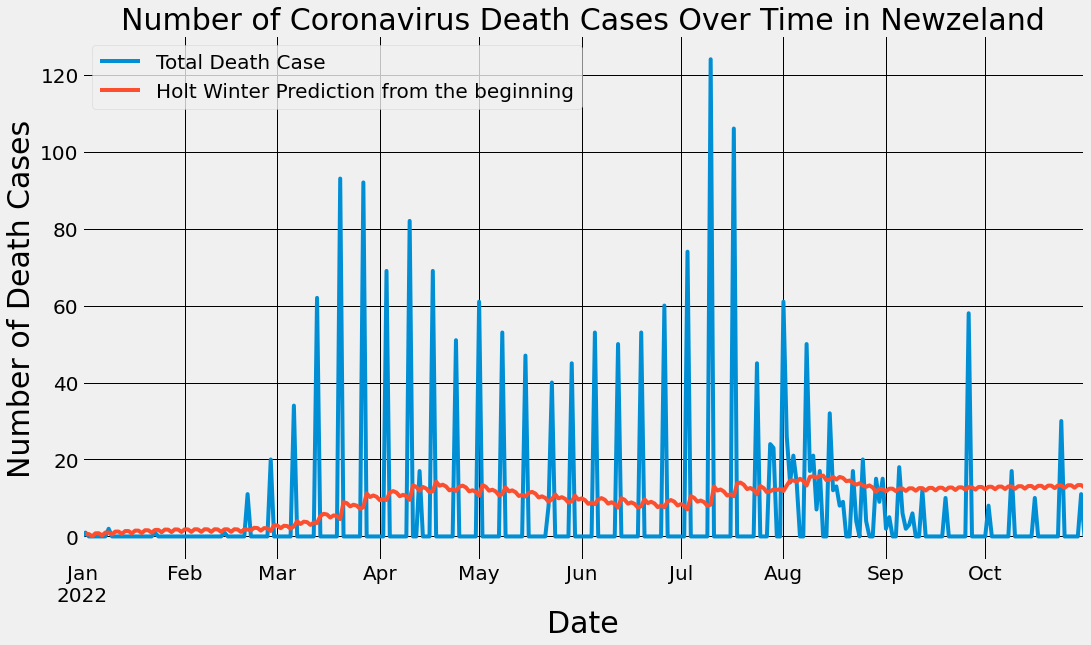

MAE: 11.751859011362878
MSE: 167.91925426153512
RMSE: 12.958366187970423
R^21 Score: -1.1001477067020673


In [58]:
 testcase,predtest,predfuture=Death(dfDeathNewzeland,'Number of Coronavirus Death Cases Over Time in Newzeland','add','add','add')

In [59]:
 testcase

Death
Date             
2022-09-01      2
2022-09-02      5
2022-09-03      0
2022-09-04      0
2022-09-05     18
...           ...
2022-10-27      0
2022-10-28      0
2022-10-29      0
2022-10-30     11
2022-10-31      0

[61 rows x 1 columns]

In [60]:
predtest

Date  predict
0  2022-09-01       12
1  2022-09-02       12
2  2022-09-03       12
3  2022-09-04       12
4  2022-09-05       12
..        ...      ...
56 2022-10-27       13
57 2022-10-28       13
58 2022-10-29       13
59 2022-10-30       13
60 2022-10-31       13

[61 rows x 2 columns]

In [61]:
predfuture

Date  Future predict
0  2022-11-01               4
1  2022-11-02               3
2  2022-11-03               4
3  2022-11-04               2
4  2022-11-05               4
5  2022-11-06               3
6  2022-11-07               4
7  2022-11-08               2
8  2022-11-09               4
9  2022-11-10               2
10 2022-11-11               4
11 2022-11-12               2
12 2022-11-13               4
13 2022-11-14               2
14 2022-11-15               4
15 2022-11-16               2
16 2022-11-17               4
17 2022-11-18               2
18 2022-11-19               3
19 2022-11-20               2

<ipython-input-4-7ec41a6a23b9>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


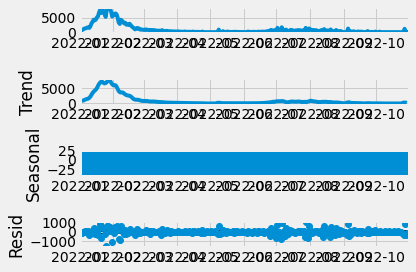

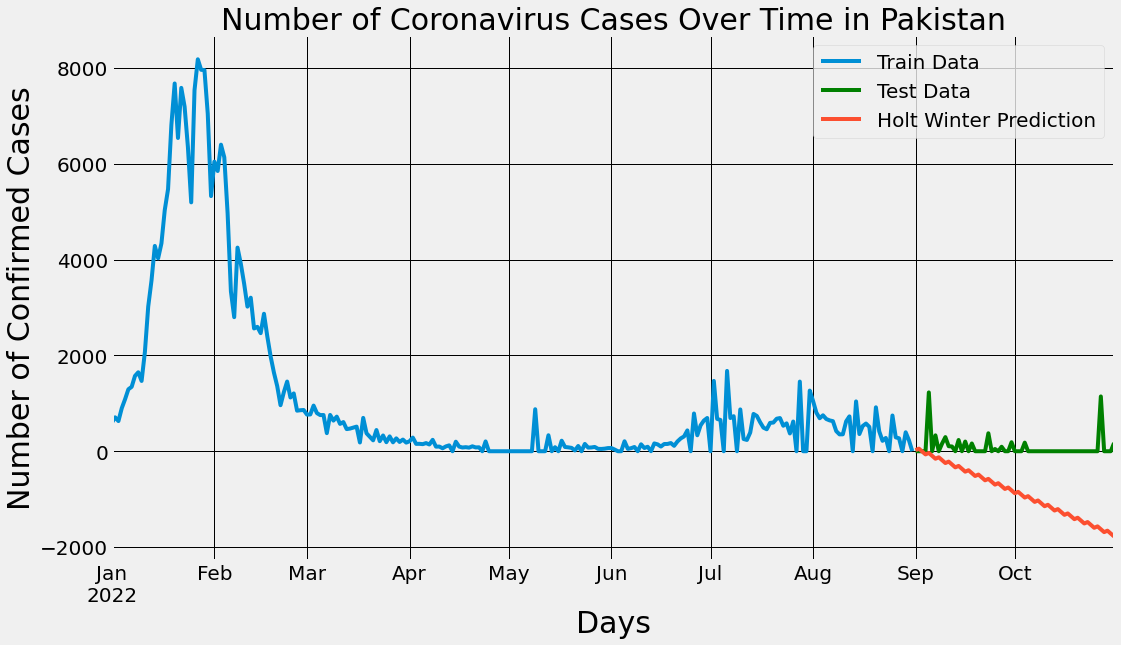

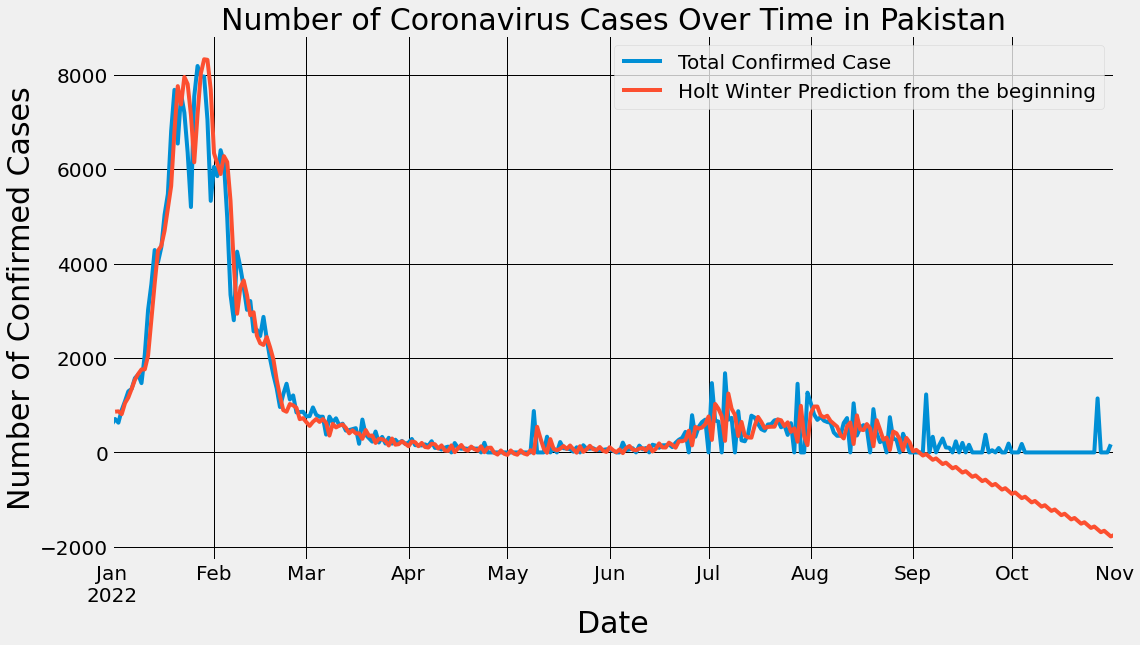

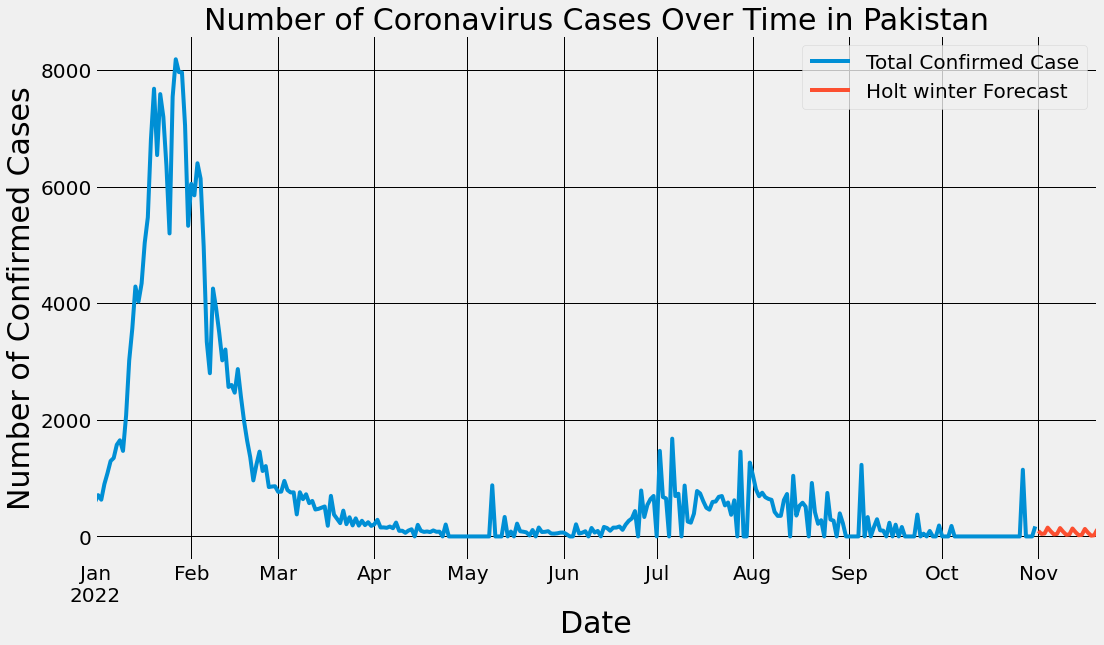

MAE: 932.5468514719477
MSE: 1163665.6548842886
RMSE: 1078.733356712533
R^21 Score: -22.51327335076045
f MAE: 295.10786628320375
f MSE: 278451.8223405232
f RMSE: 527.6853440645507
f R^21 Score: 0.9058675070036541


In [62]:
 testcase,predtest,predfuture=Confirm(dfconfirmPakistan,'Number of Coronavirus Cases Over Time in Pakistan','add','add','add')

In [63]:
 testcase

Confirmed
Date                 
2022-09-01          0
2022-09-02          0
2022-09-03          0
2022-09-04          0
2022-09-05       1228
...               ...
2022-10-27       1144
2022-10-28          0
2022-10-29          0
2022-10-30          0
2022-10-31        172

[61 rows x 1 columns]

In [64]:
predtest


Date  predict
0  2022-09-01       24
1  2022-09-02       54
2  2022-09-03        6
3  2022-09-04       66
4  2022-09-05       36
..        ...      ...
56 2022-10-27     1628
57 2022-10-28     1689
58 2022-10-29     1658
59 2022-10-30     1718
60 2022-10-31     1779

[61 rows x 2 columns]

In [65]:
predfuture

Date  Future predict
0  2022-11-01              95
1  2022-11-02              43
2  2022-11-03              50
3  2022-11-04             151
4  2022-11-05              88
5  2022-11-06              36
6  2022-11-07              43
7  2022-11-08             144
8  2022-11-09              80
9  2022-11-10              28
10 2022-11-11              35
11 2022-11-12             136
12 2022-11-13              73
13 2022-11-14              21
14 2022-11-15              28
15 2022-11-16             129
16 2022-11-17              65
17 2022-11-18              13
18 2022-11-19              20
19 2022-11-20             121

<ipython-input-5-60f62ee07eff>:19: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=str1,freq=4).plot()
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


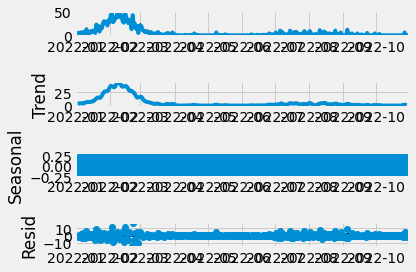

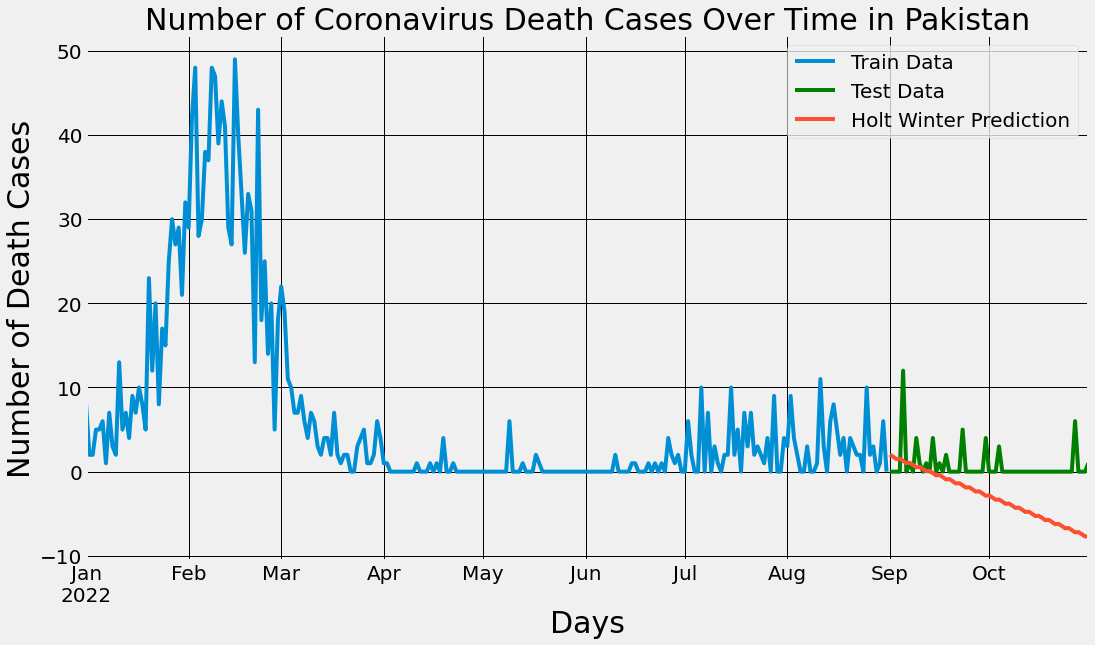

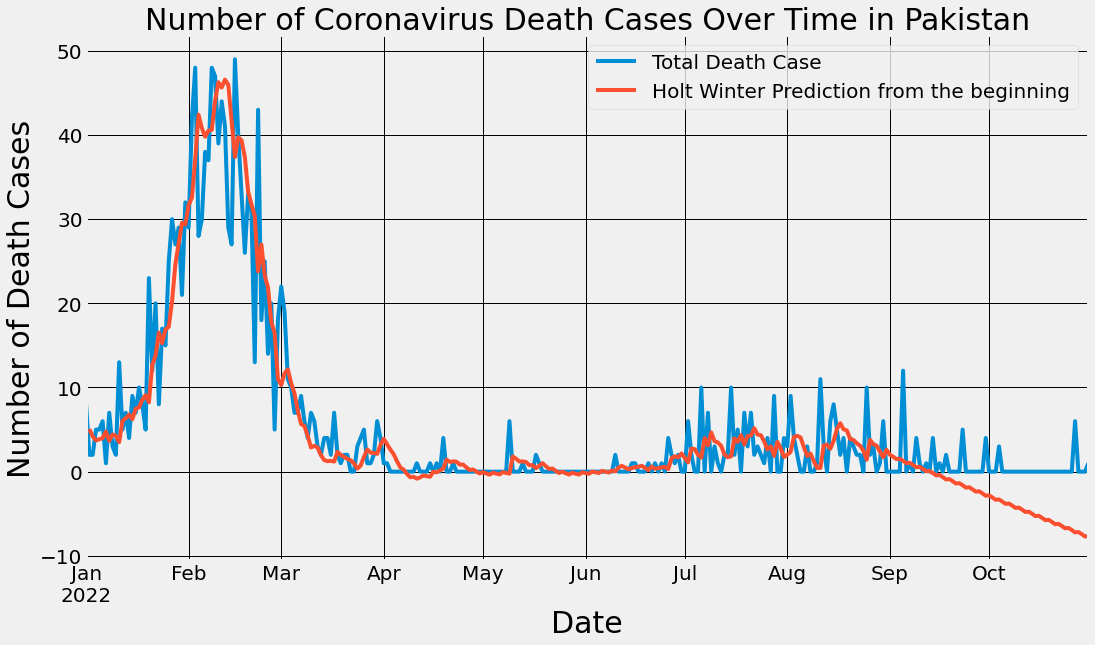

MAE: 3.94886639587567
MSE: 23.10239125581477
RMSE: 4.806494695286241
R^21 Score: -4.926099397689699


In [66]:
 testcase,predtest,predfuture=Death(dfDeathPakistan,'Number of Coronavirus Death Cases Over Time in Pakistan','add','add','add')

In [67]:
 testcase

Death
Date             
2022-09-01      0
2022-09-02      0
2022-09-03      0
2022-09-04      0
2022-09-05     12
...           ...
2022-10-27      6
2022-10-28      0
2022-10-29      0
2022-10-30      0
2022-10-31      1

[61 rows x 1 columns]

In [68]:
predtest

Date  predict
0  2022-09-01        2
1  2022-09-02        2
2  2022-09-03        1
3  2022-09-04        2
4  2022-09-05        1
..        ...      ...
56 2022-10-27        7
57 2022-10-28        7
58 2022-10-29        7
59 2022-10-30        8
60 2022-10-31        8

[61 rows x 2 columns]

In [69]:
predfuture

Date  Future predict
0  2022-11-01               2
1  2022-11-02               1
2  2022-11-03               1
3  2022-11-04               1
4  2022-11-05               2
5  2022-11-06               2
6  2022-11-07               2
7  2022-11-08               2
8  2022-11-09               2
9  2022-11-10               2
10 2022-11-11               2
11 2022-11-12               2
12 2022-11-13               3
13 2022-11-14               2
14 2022-11-15               2
15 2022-11-16               2
16 2022-11-17               3
17 2022-11-18               3
18 2022-11-19               3
19 2022-11-20               3